Olá, 

Meu nome é Ramon. Fico feliz em revisar seu projeto. Ao ao longo do texto farei algumas observações sobre melhorias no código e também farei comentários sobre suas percepções sobre o assunto. Estarei aberto a feedbacks e discussões sobre o tema.

**Peço que mantenha e não altere os comentários que eu fizer por aqui para que possamos nos localizar posteriormente, ok?**

Mais uma coisa, vamos utilizar um código de cores para você entender os meus feedbacks no seu notebook. Funciona assim:

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Sucesso. Tudo foi feito corretamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentário do revisor: </b> <a class="tocSkip"></a>

Alerta não crítco, mas que pode ser corrigido para melhoria geral no seu código/análise
</div>

<div class="alert alert-block alert-danger">

<b>Comentário do revisor: </b> <a class="tocSkip"></a>
    
Erro que precisa ser consertado, caso contrário seu projeto **não** será aceito.
</div>

Você pode me responder usando isso:
<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b> <a class="tocSkip"></a>
</div>

###

<div class="alert alert-block alert-success">
<b>Comentário Geral do Revisor</b> <a class="tocSkip"></a>

Obrigado por enviar seu projeto. 
    
Parabéns, você fez um bom trabalho.

Como pontos fortes do projeto, destaco:
- Código simples e eficiente (sem loop desnecessário)
- Uso adequado dos recursos da lição
- Funções para reúso
- Análises bem detalhadas    

Deixei apenas duas dicas de melhoria.
    
Bom trabalho. Você programa bem. Demonstra uma boa maturidade. Parabéns pelo empenho. Desejo sucesso.
</div>



# Qual é o melhor plano?

Você trabalha como analista para a empresa de telecomunicações Megaline. A empresa oferece aos clientes dois planos pré-pagos: Surf e Ultimate. O departamento comercial quer saber qual dos planos gera mais receita para ajustar o orçamento de publicidade.

Você vai realizar uma análise preliminar dos planos com base em uma pequena seleção de clientes. Você terá dados de 500 clientes da Megaline: que clientes são, de onde eles são, qual plano usam e o número de chamadas e mensagens realizadas em 2018. Seu trabalho é analisar o comportamento dos clientes e determinar qual plano pré-pago gera mais receita.

Plano geral: 

O plano principal é explorar os dados recebidos, verificar se a informação faz sentido para o tipo de dados em que foi recebida, estudar o comportamento da informação referente a cada plano (surf - ultimate) e cumprir com o objetivo solicitado pela empresa ou seja: analisar o comportamento dos clientes e determinar qual plano pré-pago gera mais receita, para isso vou descrever estatisticamente cada plano por categoria e visualizar os resultados para definir as conclusões respectivas.

## Inicialização

In [1]:
# Carregando todas as bibliotecas

import pandas as pd 
import numpy as np
from math import factorial
from scipy import stats as st
import math as mt
from matplotlib import pyplot as plt


## Carregue os dados

In [2]:
# /////////////////////////////////////////////// LENDO OS ARQUIVOS //////////////////////////////////////////////////////////
df_user_id  = pd.read_csv('/datasets/megaline_users.csv',    sep = ',')
df_calls    = pd.read_csv('/datasets/megaline_calls.csv',    sep = ',')
df_messages = pd.read_csv('/datasets/megaline_messages.csv', sep = ',')
df_internet = pd.read_csv('/datasets/megaline_internet.csv', sep = ',')
df_plans    = pd.read_csv('/datasets/megaline_plans.csv',    sep = ',')

# //////////////////////////////////////// DICIONÁRIO DO MÊS - LISTA DO MÊS //////////////////////////////////////////////////

id_mes = {'January':'1',
          'February':'2',
          'March':'3',
          'April':'4',
          'May':'5',
          'June':'6',
          'July':'7',
          'August':'8',
          'September':'9',
          'October':'10',
          'November':'11',
          'December':'12'  }

lista_mes = ['January', 'February','March','April','May','June','July','August','September','October','November','December']

colunas_usuario_mes = ['user_id','January', 'February','March','April','May','June','July','August','September','October','November','December']
 

# ///////////////////////////// DESCRIÇÃO DA FUNÇÃO VERIFICAÇÃO DE NOMES DAS COLUNAS //////////////////////////////////////////
def cabeçalhos_df (df):
    coluna_nova = []
    for aux_col in df.columns:
        sem_espaços = aux_col.strip()
        minuscula = sem_espaços.lower()
        underline = minuscula.replace(' ','_')
        coluna_nova.append(underline)
    df.columns = coluna_nova
    return df

# ////////////////////////////////////// MODIFICAR CABEÇALHOS DAS COLUNAS ///////////////////////////////////////////////////
def modificar_cabeçalhos_df (df, indice,renome): #num_col, renome
    colunas = list(df.columns)
    colunas.pop(indice-1)
    colunas.insert(indice-1,renome)#a = colunas[indice-1]
    df.columns = colunas
    return df


# /////////////////// DESCRIÇÃO DA FUNÇÃO DUPLICADOS DE DATAFRAME EXPLÍCITOS ////////////////////////////////////////
# Definimos uma função que permita recebir um DataFrame e retorne todas as linhas duplicadas assim como a quantidade total de linhas
# Aplicamos o método duplicated() para atribuir a um DataFrame auxiliar com variavel local:aux_df_duplicado os valores duplicados explicitos
# Aplicamos ao DataFrame recebido os metodos duplicated() e sum() para obter as quantidades de linhas duplicadas e atribuímos esse valor à variavel tam_df_duplicado
# Comparamos as quantidades com a condição se são maior do que 0 (zero) é porque tem linhas duplicadas se não, quer dizer que não temos duplicados explicitos nesse DataFrame
# A função vai retornar o DataFrame com linhas duplicadas e as quantiidades de linhas

def df_duplicado (df):                                                         
    aux_df_duplicado = df[df.duplicated()]
    tam_df_duplicado = df.duplicated().sum()
    if tam_df_duplicado > 0:
        return print(f"{aux_df_duplicado}, Quantidade de duplicados explicitos na tabela é = {tam_df_duplicado}")
       
    else:
        return print(f"Quantidade de duplicados explicitos na tabela é = {tam_df_duplicado}")


# ////////// DESCRIÇÃO DA FUNÇÃO DUPLICADOS DE SERIES EXPLÍCITOS ////////////////////////////////////////
# Definimos uma função que permita recebir uma Serie (parametro: DataFrame e nome da coluna) e retorne todas as linhas duplicadas assim como a quantidade total de linhas
# Aplicamos o método value_count() á coluna para obter os valores unívocos e sua quantidade e atribuimos para uma variavel aux_serie_duplicado
# Atribuimos todos os valores resultante de filtrar a coluna com seus valores booleanos a uma vaivel mascara onde estejam os valores maior que 1 garantindo que os valores estejam mais de uma vez na coluna
# Aplicamos o metodo index passando os valores da mascara com os valores duplicado na coluna e atribuimos na variavel, para criar a serie com os valores duplicados na coluna
# A função vai retornar uma serie com os valores duplicados explicitos e as quantiidades de valores pode ser zero ou uma lista se tiver

def serie_duplicado (serie,column):
    aux_serie_duplicado = serie[column].value_counts()
    mascara = aux_serie_duplicado > 1
    duplicado = aux_serie_duplicado.index[mascara]
    if len(duplicado) > 1:
        return print(f"{duplicado}, Quantidade de valores duplicados implicitos na culuna {coluna} é = {len(duplicado)}")
    else:
        return print(f"Quantidade de valores duplicados implicitos na culuna {coluna} é = {len(duplicado)}")    
    
    
    
#/////////// DESCRIÇÃO DA FUNÇÃO SUBSTITUIR VALORES AUSENTES EM UMA COLUMA /////////////////////  
# A função recibe como parametros um DataFrame, nome de uma coluna e o valor para preencher os valores ause
# Criamos uma lista com os nomes das colunas onde temos valores ausentes para serem repetidos nos ciclos de iteração com a coluna recebida (serie) como parametro
# Criamos um ciclo 'for' para percorrer a tabela naa coluna especificada
# Aplicamos o metodo fillna() e utilizamos o valor recebido para preencher os valores ausentes
# A função retorna DataFrama recebido com os valores ausente preenchidos na coluna especificada
    
def substituir_nan_coluna (df,column,valor):
    for col in column:
        df[col].fillna(valor, inplace=True)
    return df


#////// FUNÇÕES PARA SEPARAR TEXTO DAS COLUNAS 'city' E 'id' //////////////////////////////////////////////////////  
# A função vai ser utilizada com outra função apply() para indicar as modificaões para ser aplicada na coluna criada

def separar_coluna_state(row):
    estado = row['city']
    lista_sep = estado.split(",")
    valor_est = lista_sep[-1]
    return valor_est

def separar_coluna(row):
    estado = row['id']
    lista_sep = estado.split("_")
    valor_seq = lista_sep[-1]
    return valor_seq


#/////////////////// CONVERTER FORMATO DE STRING PARA DATATIME ///////////////////////////////////////////////////////

def formato_data (date):
    data = pd.to_datetime(date, format = '%Y-%m-%d')
    return data

#/////////////////// EXTRAIR COLUNA CATEGORICA PARA MES /////////////////////////////////////////////////////////////

def criar_coluna_mes(data):
    return data.strftime('%B')

#/////////////////// ARREDONDAR VALORES PARA ACIMA /////////////////////////////////////////////////////////////////

def arredondar_acima (valor):
    arrend = mt.ceil(valor)
    return arrend

#/////////////////// CONVERTER VALORES DE MB PARA GB //////////////////////////////////////////////////////////////

def conver_mb_gb (dado):
    aux = dado/1000
    return aux

#////////////////// DESCRIÇÃO DA FUNÇÃO VALIDAR_DATA (df, col, limit_inf, limit_sup) //////////////////////////////// 
# VERIFICA SE UM CONJUNTO DE DATAS ESTÁ DENTRO DO INTERVALO DE TEMPO ESPECIFICADO 

def validar_data (df, col, limit_inf, limit_sup) :
    
    df = df[(df[col] < limit_inf) | (df[col] > limit_sup)] # Garantir que todos os valores correspondem para o ano 2018
    if len(df) > 0:
        return df
    else:
        return print(f"Não há registros fora do intervalo indicado: {limit_inf} - {limit_sup}")

    
#////////////////// DESCRIÇÃO DA FUNÇÃO CALCULA MEDIA E VARIANÇA DE UMA COLUNA NÚMERICA (df, col, plan) ////////////////////////////////  
    
def media__variança_coluna(df,col,plan):
    media = df[col].mean()
    mediana = df[col].median()
    var   = df[col].var()
    desv  = mt.sqrt(var)
    plano = plan
    return print(f"\nVARIÁVEIS ESTATÍSTICAS DESCRITIVAS DO PLANO: {plano} /////////////////////////////////////\n Meia estatística: {media}\n Mediana estatística: {mediana} \n Variança estatística: {var}\n Desviação padrão: {desv}")
    


## Prepare os dados

## Planos

In [3]:
# Imprima informações gerais/resumo sobre o DataFrame dos planos
df_plans.info()
print()
print('///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////')

print(df_plans.describe(include = 'all'))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes

///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
        messages_included  mb_per_month_included  minutes_included  \
count            2.000000               2.000000          2.000000   
unique                NaN                    NaN    

In [4]:
# Imprima uma amostra de dados dos planos

df_plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


Podemos observar claramente as características de cada plano oferecido pela telecomunicações Megaline. A empresa oferece aos clientes dois planos pré-pagos: Surf e Ultimate, onde você pode ver que temos uma coluna chamada usd_monthly_pay (Referindo-se ao pagamento) e as informações recebidas diretamente da empresa na descrição do problema temos o seguinte para esse nome de coluna nome: usd_monthly_fee (referindo-se a uma taxa).


É importante descrever claramente o nome de cada coluna porque a sua referência determinará o endereço a partir do qual será atribuída a informação relativa a essa entidade, por isso vamos fazer a alteração para ajustar o nome da coluna de acordo com a informação recebida pelo The empresa determina que essa coluna se refere a uma taxa e não a um pagamento

## Corrija os dados

Podemos observar que o nome da coluna número 4 (usd_monthly_pay) possui diferenças com o nome das instruções recebidas da empresa, (usd_monthly_fee) então precisamos fazer os ajustes na coluna e também executar uma função que garanta que os nomes das colunas estão corretos de acordo com as boas práticas.

In [5]:
cabeçalhos_df(df_plans)

coluna      = 4
descri_nova = 'usd_monthly_fee'
modificar_cabeçalhos_df(df_plans,coluna,descri_nova)

,messages_included,mb_per_month_included,minutes_included,usd_monthly_fee,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Enriqueça os dados

Observando as informações refletidas na tabela do plano, não vemos que a única informação que poderíamos 
 adicionar as unidades de medida das grandezas das variáveis ($, minutos, GB, etc.), que poderiam ser usadas como referência em futuras conversões de unidades (de minuto para segundo, por exemplo), mas podem ser impraticáveis por enquanto

## Usuários

In [6]:
# Imprima informações gerais/resumo sobre o DataFrame dos usuários
#cabeçalhos_df(df_user_id)

df_user_id.info()
print()
print('///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////')

print(df_user_id.describe(include = 'all'))
print()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB

///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
            user_id first_name last_name         age  \
count    500.000000        500       500  500.000000   
unique          NaN        458       399         NaN   
top             NaN    Seymour    Grimes         NaN   
freq            NaN          3         3         NaN   
mean    1249.500000        NaN       NaN   4

In [7]:
# Imprima uma amostra de dados dos usuários

df_user_id.sample(20)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
375,1375,Andy,Holden,69,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-12-01,surf,NaN
15,1015,Beata,Carpenter,26,"Pittsburgh, PA MSA",2018-12-05,surf,NaN
404,1404,Paulita,Conley,33,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-16,surf,NaN
60,1060,Denisse,Santos,53,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-04-07,surf,NaN
26,1026,Meggan,Hamilton,49,"Houston-The Woodlands-Sugar Land, TX MSA",2018-07-20,ultimate,NaN
451,1451,Lenard,Harding,53,"Charlotte-Concord-Gastonia, NC-SC MSA",2018-02-15,ultimate,2018-12-10
484,1484,Delpha,Baldwin,46,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN
101,1101,Sage,Conley,27,"Washington-Arlington-Alexandria, DC-VA-MD-WV MSA",2018-02-08,surf,NaN
483,1483,Miguel,Farrell,35,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-04-25,surf,NaN
221,1221,Mckenzie,Wilkinson,18,"Boston-Cambridge-Newton, MA-NH MSA",2018-12-17,surf,NaN


Podemos observar informações relevantes nas colunas 'city', 'reg_date' e 'churn_date', neste caso é aconselhável separar o endereço específico da abreviatura na coluna 'city' para criar uma coluna categórica.

Coluna: 'reg_date' por ser do tipo string, deve ser transformada em datatime para poder interagir com as datas cadastradas e poder verificar os intervalos de tempo.

Coluna:'churn_date', esta coluna registra o preenchimento datas de culminação de cada usuário com o plano inscrito, podemos deduzir que para colunas vazias ou colunas com valores nulos que os usuários que possuem esses valores ainda estão ativos.

### Corrija os dados

In [8]:
cabeçalhos_df(df_user_id)

df_duplicado(df_user_id)
print()
print('///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////')


coluna = 'user_id'
serie_duplicado(df_user_id, coluna)
print()
print('///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////')

coluna = ['churn_date']
val = 'active'
substituir_nan_coluna(df_user_id,coluna,val)

df_user_id.info()
print()
print('///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////')

df_user_id

Quantidade de duplicados explicitos na tabela é = 0

///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
Quantidade de valores duplicados implicitos na culuna user_id é = 0

///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB

//////////////////////////////////////////////////////////////////////////////////

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,active
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,active
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,active
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,active
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,active
...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,active
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,active
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,active
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,active


### Enriqueça os dados

In [9]:
df_user_id['state'] = df_user_id.apply(separar_coluna_state, axis=1)

x = list(df_user_id.columns)
y = x.pop(-1)
x.insert(5,y)
df_user_id= df_user_id[x]

df_user_id['reg_date']=df_user_id['reg_date'].apply(formato_data)

data_inf = '2018-01-01'
data_sup = '2018-12-31'
coluna   = 'reg_date'
validar_data (df_user_id, coluna, data_inf, data_sup)

df_user_id['month'] = df_user_id['reg_date'].apply(criar_coluna_mes)
df_user_id['id_month'] = df_user_id['month'].replace(id_mes)
print()
print('//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////')
df_user_id.info()
print()
print('//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////')
df_user_id


Não há registros fora do intervalo indicado: 2018-01-01 - 2018-12-31

//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   state       500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   plan        500 non-null    object        
 8   churn_date  500 non-null    object        
 9   month       500 non-null    object        
 10  id_month    500 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 43.1+ KB

///////////

,user_id,first_name,last_name,age,city,state,reg_date,plan,churn_date,month,id_month
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",GA MSA,2018-12-24,ultimate,active,December,12
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",WA MSA,2018-08-13,surf,active,August,8
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",NV MSA,2018-10-21,surf,active,October,10
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",OK MSA,2018-01-28,surf,active,January,1
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",WA MSA,2018-05-23,surf,active,May,5
...,...,...,...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",NY-NJ-PA MSA,2018-09-04,surf,active,September,9
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",LA MSA,2018-02-20,surf,active,February,2
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",CA MSA,2018-12-10,ultimate,active,December,12
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",NY-NJ-PA MSA,2018-02-04,surf,active,February,2


## Chamadas

In [10]:
# Imprima informações gerais/resumo sobre o DataFrame das chamadas
df_calls.info()
print()
print('///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////')

print(df_calls.describe(include = 'all'))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB

///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
             id        user_id   call_date       duration
count    137735  137735.000000      137735  137735.000000
unique   137735            NaN         351            NaN
top     1073_50            NaN  2018-12-27            NaN
freq          1            NaN        1091            NaN
mean        NaN    1247.658046         NaN       6.745927
std         NaN     139.416268         NaN       5.839241
min         NaN    1000.000000         NaN       0.0000

In [11]:
# Imprima uma amostra de dados das chamadas

df_calls.sample(20)

,id,user_id,call_date,duration
43012,1157_41,1157,2018-12-08,0.00
102413,1363_26,1363,2018-10-15,9.65
109746,1387_118,1387,2018-08-19,17.94
108138,1382_1266,1382,2018-10-08,15.29
108962,1385_32,1385,2018-12-17,2.35
803,1004_318,1004,2018-09-30,14.81
113287,1398_67,1398,2018-11-16,16.94
38722,1144_663,1144,2018-05-27,9.67
25498,1098_175,1098,2018-10-31,10.28
78198,1280_202,1280,2018-10-18,12.23


Podemos observar vários detalhes na coluna ‘id’, ‘call_date’, ‘duration’ que podemos descrever abaixo:

Coluna ‘id’: podemos ver que temos a sequência de chamadas realizadas pelos usuários e ela pode ser separada em outra coluna para observar o fluxo de chamadas por usuário e por plano

Coluna: 'call_date' é uma string e deve ser convertida para datatime para processar melhor  os registros das datas em que cada usuário realizou cada chamada.

Coluna: 'duration' são os registros de duração de cada chamada em minutos, e como as condições dos planos exigem que cada chamada, mesmo que seja um segundo, deve arredondar, esta coluna deve ser processada.

### Corrija os dados

In [12]:
cabeçalhos_df(df_calls)
df_duplicado(df_calls)
print()
print('///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////')

coluna = 'id'
serie_duplicado(df_calls, coluna)
print()
print('///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////')

df_calls['call_date']= df_calls['call_date'].apply(formato_data)

data_inf = '2018-01-01'
data_sup = '2018-12-31'
coluna   = 'call_date'
validar_data (df_calls, coluna, data_inf, data_sup)
print()
print('///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////')

df_calls.info()
print()
print('///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////')

df_calls

Quantidade de duplicados explicitos na tabela é = 0

///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
Quantidade de valores duplicados implicitos na culuna id é = 0

///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
Não há registros fora do intervalo indicado: 2018-01-01 - 2018-12-31

///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72
137731,1499_200,1499,2018-10-20,10.89
137732,1499_201,1499,2018-09-21,8.12
137733,1499_202,1499,2018-10-10,0.37


### Enriqueça os dados

In [13]:
df_calls['called_sequence'] = df_calls.apply(separar_coluna, axis=1)

df_calls['month'] = df_calls['call_date'].apply(criar_coluna_mes)
df_calls['id_month'] = df_calls['month'].replace(id_mes)

def nome_categoria (celula):
    celula = 'chamadas_mes'
    return celula

df_calls['category'] = df_calls.apply(nome_categoria, axis=1)

df_calls['min_cobrado'] = df_calls['duration'].apply(arredondar_acima)

lista_col = ['id', 'user_id', 'category', 'call_date', 'duration', 'min_cobrado', 'id_month', 'month', 'called_sequence']
df_calls = df_calls.reindex(lista_col, axis=1)

df_calls

,id,user_id,category,call_date,duration,min_cobrado,id_month,month,called_sequence
0,1000_93,1000,chamadas_mes,2018-12-27,8.52,9,12,December,93
1,1000_145,1000,chamadas_mes,2018-12-27,13.66,14,12,December,145
2,1000_247,1000,chamadas_mes,2018-12-27,14.48,15,12,December,247
3,1000_309,1000,chamadas_mes,2018-12-28,5.76,6,12,December,309
4,1000_380,1000,chamadas_mes,2018-12-30,4.22,5,12,December,380
...,...,...,...,...,...,...,...,...,...
137730,1499_199,1499,chamadas_mes,2018-11-21,8.72,9,11,November,199
137731,1499_200,1499,chamadas_mes,2018-10-20,10.89,11,10,October,200
137732,1499_201,1499,chamadas_mes,2018-09-21,8.12,9,9,September,201
137733,1499_202,1499,chamadas_mes,2018-10-10,0.37,1,10,October,202


## Mensagens

In [14]:
# Imprima informações gerais/resumo sobre o DataFrame das mensagens

df_messages.info()
print()
print('///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////')

print(df_messages.describe(include = 'all'))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB

///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
              id       user_id message_date
count      76051  76051.000000        76051
unique     76051           NaN          351
top     1476_234           NaN   2018-12-28
freq           1           NaN          702
mean         NaN   1245.972768          NaN
std          NaN    139.843635          NaN
min          NaN   1000.000000          NaN
25%          NaN   1123.000000          NaN
50%          NaN   1251.000000          NaN
75%          NaN   1362.000000          NaN
max          NaN   1497.000

In [15]:
# Imprima uma amostra dos dados das mensagens

df_messages.sample(20)

,id,user_id,message_date
68955,1447_23,1447,2018-12-16
12017,1080_20,1080,2018-10-02
22109,1132_1723,1132,2018-08-27
45821,1313_17,1313,2018-08-27
48800,1326_337,1326,2018-09-26
13967,1095_78,1095,2018-11-14
39903,1258_380,1258,2018-10-12
75107,1489_182,1489,2018-09-29
32842,1204_37,1204,2018-12-26
28034,1173_29,1173,2018-09-29


Podemos observar vários detalhes na coluna ‘id’, ‘message_date’ que podemos descrever abaixo:

Coluna ‘id’: podemos ver que temos a sequência das mensagens realizadas pelos usuários e ela pode ser separada em outra coluna para observar o fluxo das mensagens por usuário e por plano

Coluna: 'message_date' é uma string e deve ser convertida para datatime para processar melhor os registros das datas em que cada usuário enviou cada mensagens.


### Corrija os dados

In [16]:
cabeçalhos_df(df_messages)
df_duplicado(df_messages)
print()
print('///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////')

coluna = 'id'
serie_duplicado(df_messages, coluna)
print()
print('///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////')

df_messages['message_date']= df_messages['message_date'].apply(formato_data)
data_inf = '2018-01-01'
data_sup = '2018-12-31'
coluna   = 'message_date'
validar_data (df_messages, coluna, data_inf, data_sup)
print()
print('///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////')

df_messages.info()
print()
print('///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////')

df_messages


Quantidade de duplicados explicitos na tabela é = 0

///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
Quantidade de valores duplicados implicitos na culuna id é = 0

///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
Não há registros fora do intervalo indicado: 2018-01-01 - 2018-12-31

///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB

/////////////////////////

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
...,...,...,...
76046,1497_526,1497,2018-12-24
76047,1497_536,1497,2018-12-24
76048,1497_547,1497,2018-12-31
76049,1497_558,1497,2018-12-24


### Enriqueça os dados

In [17]:
df_messages['message_sequence'] = df_messages.apply(separar_coluna, axis=1)

df_messages['month'] = df_messages['message_date'].apply(criar_coluna_mes)
df_messages['id_month'] = df_messages['month'].replace(id_mes)

def nome_categoria (celula):
    celula = 'message_mes'
    return celula

df_messages['category'] = df_messages.apply(nome_categoria, axis=1)
lista_col_msm = ['id', 'user_id', 'category', 'message_date', 'id_month', 'month', 'message_sequence']
df_messages = df_messages. reindex(lista_col_msm, axis = 1)

df_messages

,id,user_id,category,message_date,id_month,month,message_sequence
0,1000_125,1000,message_mes,2018-12-27,12,December,125
1,1000_160,1000,message_mes,2018-12-31,12,December,160
2,1000_223,1000,message_mes,2018-12-31,12,December,223
3,1000_251,1000,message_mes,2018-12-27,12,December,251
4,1000_255,1000,message_mes,2018-12-26,12,December,255
...,...,...,...,...,...,...,...
76046,1497_526,1497,message_mes,2018-12-24,12,December,526
76047,1497_536,1497,message_mes,2018-12-24,12,December,536
76048,1497_547,1497,message_mes,2018-12-31,12,December,547
76049,1497_558,1497,message_mes,2018-12-24,12,December,558


## Internet

In [18]:
# Imprima informações gerais/resumo sobre o DataFrame da internet
df_internet.info()
print()
print('///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////')

print(df_internet.describe(include = 'all'))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB

///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
             id        user_id session_date        mb_used
count    104825  104825.000000       104825  104825.000000
unique   104825            NaN          351            NaN
top     1073_50            NaN   2018-12-24            NaN
freq          1            NaN          851            NaN
mean        NaN    1242.496361          NaN     366.713701
std         NaN     142.053913          NaN     277.170542
min         NaN    1000.000000

In [19]:
#  Imprima uma amostra de dados para o tráfego da internet

df_internet.sample(20)

,id,user_id,session_date,mb_used
73303,1343_163,1343,2018-11-20,450.49
98105,1462_78,1462,2018-12-20,462.90
41915,1187_92,1187,2018-07-02,763.65
44399,1196_409,1196,2018-10-26,486.32
42567,1188_212,1188,2018-10-14,0.00
23994,1110_252,1110,2018-10-22,0.00
33742,1153_278,1153,2018-12-17,533.36
27799,1127_631,1127,2018-12-14,549.33
58402,1263_206,1263,2018-04-06,94.29
55899,1252_437,1252,2018-06-18,411.74


Podemos observar vários detalhes na coluna ‘id’, ‘session_date’, ‘mb_used’ que podemos descrever abaixo:

Coluna ‘id’: podemos ver que temos a sequência de sessão de internet realizadas pelos usuários e ela pode ser separada em outra coluna para observar o fluxo de trafego por usuário e por plano

Coluna: 'session_date' é uma string e deve ser convertida para datatime para processar melhor os registros das datas em que cada usuário realizou cada sessão de internet.

Coluna: 'mb_used' são os registros de duração de sessão de internet em MB de cada usuario, e como as condições dos planos exigem que cada plano seja arredondado ao final de cada mes, esta coluna deve ser processada em função desse objetivo.

### Corrija os dados

In [20]:
cabeçalhos_df(df_internet)
df_duplicado(df_internet)
print()
print('///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////')

coluna = 'id'
serie_duplicado(df_internet, coluna)
print()
print('///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////')

df_internet['session_date']= df_internet['session_date'].apply(formato_data)
data_inf = '2018-01-01'
data_sup = '2018-12-31'
coluna   = 'session_date'
validar_data (df_internet, coluna, data_inf, data_sup)
print()
print('///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////')

df_internet['gb_used'] = df_internet['mb_used'].apply(conver_mb_gb)

df_internet.info()
print()
print('///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////')
df_internet

Quantidade de duplicados explicitos na tabela é = 0

///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
Quantidade de valores duplicados implicitos na culuna id é = 0

///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
Não há registros fora do intervalo indicado: 2018-01-01 - 2018-12-31

///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
 4   gb_used       104825 non-null  f

,id,user_id,session_date,mb_used,gb_used
0,1000_13,1000,2018-12-29,89.86,0.08986
1,1000_204,1000,2018-12-31,0.00,0.00000
2,1000_379,1000,2018-12-28,660.40,0.66040
3,1000_413,1000,2018-12-26,270.99,0.27099
4,1000_442,1000,2018-12-27,880.22,0.88022
...,...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06,0.21806
104821,1499_216,1499,2018-12-30,304.72,0.30472
104822,1499_217,1499,2018-09-22,292.75,0.29275
104823,1499_218,1499,2018-12-07,0.00,0.00000


### Enriqueça os dados

In [21]:
df_internet['internet_sequence'] = df_internet.apply(separar_coluna, axis=1)

df_internet['month'] = df_internet['session_date'].apply(criar_coluna_mes)
df_internet['id_month'] = df_internet['month'].replace(id_mes)

def nome_categoria (celula):
    celula = 'trafego_mes'
    return celula

df_internet['category'] = df_internet.apply(nome_categoria, axis=1)
lista_colo_traf = ['id', 'user_id', 'category', 'session_date', 'mb_used', 'gb_used','id_month','month','internet_sequence']
df_internet = df_internet.reindex(lista_colo_traf, axis=1)

df_internet

,id,user_id,category,session_date,mb_used,gb_used,id_month,month,internet_sequence
0,1000_13,1000,trafego_mes,2018-12-29,89.86,0.08986,12,December,13
1,1000_204,1000,trafego_mes,2018-12-31,0.00,0.00000,12,December,204
2,1000_379,1000,trafego_mes,2018-12-28,660.40,0.66040,12,December,379
3,1000_413,1000,trafego_mes,2018-12-26,270.99,0.27099,12,December,413
4,1000_442,1000,trafego_mes,2018-12-27,880.22,0.88022,12,December,442
...,...,...,...,...,...,...,...,...,...
104820,1499_215,1499,trafego_mes,2018-10-20,218.06,0.21806,10,October,215
104821,1499_216,1499,trafego_mes,2018-12-30,304.72,0.30472,12,December,216
104822,1499_217,1499,trafego_mes,2018-09-22,292.75,0.29275,9,September,217
104823,1499_218,1499,trafego_mes,2018-12-07,0.00,0.00000,12,December,218


## Estude as condições dos planos

## Agregue os dados por usuário


In [22]:
# Imprima as condições dos planos e certifique-se de que elas fazem sentido para você

print("Descrição dos planos \n Observação: a Megaline arredonda segundos para minutos e megabytes para gigabytes. Para chamadas, cada chamada individual\n é arredondada para cima: mesmo que uma chamada tenha durado apenas um segundo, um minuto será contado. Para tráfego da web,\n sessões individuais da web não são arredondadas para cima. Ao invés disso, o total do mês é arredondado para cima. Se alguém\n usar 1.025 megabytes no mês, a cobrança será de 2 gigabytes.\n\n Aqui está uma descrição dos planos:")

print("\tSurf:\n\t 1. Preço mensal: $20\n\t 2. 500 minutos mensais, 50 mensagens de texto e 15 GB de dados\n\t 3. Após exceder os limites do pacote:\n\t\t* 1 minuto: 3 centavos\n\t\t* 1 mensagem de texto: 3 centavos\n\t\t* 1 GB de dados: $10")

print("\n\tUltimate:\n\t 1. Preço mensal: $70\n\t 2. 3.000 minutos mensais, 1.000 mensagens de texto e 30 GB de dados\n\t 3. Após exceder os limites do pacote:\n\t\t* 1 minuto: 1 centavo\n\t\t* 1 mensagem de texto: 1 centavo\n\t\t* 1 GB de dados: $7" )
print()
print("OGETIVO GERAL: \trealizar uma análise preliminar dos planos: que clientes são, de onde eles são, qual plano usam e o número de\n\t\tchamadas e mensagens realizadas em 2018. Seu trabalho é analisar o comportamento dos clientes e determinar qual\n\t\tplano pré-pago gera mais receita")

Descrição dos planos 
 Observação: a Megaline arredonda segundos para minutos e megabytes para gigabytes. Para chamadas, cada chamada individual
 é arredondada para cima: mesmo que uma chamada tenha durado apenas um segundo, um minuto será contado. Para tráfego da web,
 sessões individuais da web não são arredondadas para cima. Ao invés disso, o total do mês é arredondado para cima. Se alguém
 usar 1.025 megabytes no mês, a cobrança será de 2 gigabytes.

 Aqui está uma descrição dos planos:
	Surf:
	 1. Preço mensal: $20
	 2. 500 minutos mensais, 50 mensagens de texto e 15 GB de dados
	 3. Após exceder os limites do pacote:
		* 1 minuto: 3 centavos
		* 1 mensagem de texto: 3 centavos
		* 1 GB de dados: $10

	Ultimate:
	 1. Preço mensal: $70
	 2. 3.000 minutos mensais, 1.000 mensagens de texto e 30 GB de dados
	 3. Após exceder os limites do pacote:
		* 1 minuto: 1 centavo
		* 1 mensagem de texto: 1 centavo
		* 1 GB de dados: $7

OGETIVO GERAL: 	realizar uma análise preliminar dos planos

In [23]:
# Calcule o número de chamadas feitas por cada usuário por mês. Salve o resultado.

n_chamadas_mes = df_calls.groupby(['user_id', 'id_month', 'month']).size().reset_index(name='calls_count')

n_chamadas_mes

,user_id,id_month,month,calls_count
0,1000,12,December,16
1,1001,10,October,65
2,1001,11,November,64
3,1001,12,December,56
4,1001,8,August,27
...,...,...,...,...
2253,1498,9,September,45
2254,1499,10,October,53
2255,1499,11,November,45
2256,1499,12,December,65


In [24]:
# Calcule a quantidade de minutos gastos por cada usuário por mês. Salve o resultado.

q_minutos_mes = df_calls.groupby(['user_id','id_month', 'month']).sum().reset_index()

q_minutos_mes

,user_id,id_month,month,duration,min_cobrado
0,1000,12,December,116.83,124
1,1001,10,October,374.11,393
2,1001,11,November,404.59,426
3,1001,12,December,392.93,412
4,1001,8,August,171.14,182
...,...,...,...,...,...
2253,1498,9,September,344.62,363
2254,1499,10,October,363.28,385
2255,1499,11,November,288.56,308
2256,1499,12,December,468.10,496


In [25]:
# Calcule o número de mensagens enviadas por cada usuário por mês. Salve o resultado.

messages_mes = df_messages.groupby(['user_id','id_month', 'month']).size().reset_index(name='message_count')

messages_mes

,user_id,id_month,month,message_count
0,1000,12,December,11
1,1001,10,October,53
2,1001,11,November,36
3,1001,12,December,44
4,1001,8,August,30
...,...,...,...,...
1801,1496,11,November,13
1802,1496,12,December,11
1803,1496,8,August,2
1804,1496,9,September,21


In [26]:
# Calcule o volume de tráfego de internet usado por cada usuário por mês. Salve o resultado.

trafego_mes = df_internet.groupby(['user_id','id_month', 'month']).sum().reset_index()
trafego_mes['gb_cobrado'] = trafego_mes['gb_used'].apply(arredondar_acima)

trafego_mes

,user_id,id_month,month,mb_used,gb_used,gb_cobrado
0,1000,12,December,1901.47,1.90147,2
1,1001,10,October,22330.49,22.33049,23
2,1001,11,November,18504.30,18.50430,19
3,1001,12,December,19369.18,19.36918,20
4,1001,8,August,6919.15,6.91915,7
...,...,...,...,...,...,...
2272,1498,9,September,22827.28,22.82728,23
2273,1499,10,October,19492.43,19.49243,20
2274,1499,11,November,16813.83,16.81383,17
2275,1499,12,December,22059.21,22.05921,23


In [27]:
# Junte os dados de chamadas, minutos, mensagens e internet com base em user_id e month

a = n_chamadas_mes.merge(q_minutos_mes, how = 'outer')   
b = a.merge(messages_mes, how = 'left')
consumo = b.merge(trafego_mes, how = 'right')

lista_col_nan = ['calls_count', 'duration', 'min_cobrado', 'message_count']
val = 0
substituir_nan_coluna(consumo, lista_col_nan, val)
df_duplicado(consumo)
print()
print('///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////')

consumo

Quantidade de duplicados explicitos na tabela é = 0

///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////


,user_id,id_month,month,calls_count,duration,min_cobrado,message_count,mb_used,gb_used,gb_cobrado
0,1000,12,December,16.0,116.83,124.0,11.0,1901.47,1.90147,2
1,1001,10,October,65.0,374.11,393.0,53.0,22330.49,22.33049,23
2,1001,11,November,64.0,404.59,426.0,36.0,18504.30,18.50430,19
3,1001,12,December,56.0,392.93,412.0,44.0,19369.18,19.36918,20
4,1001,8,August,27.0,171.14,182.0,30.0,6919.15,6.91915,7
...,...,...,...,...,...,...,...,...,...,...
2272,1498,9,September,45.0,344.62,363.0,0.0,22827.28,22.82728,23
2273,1499,10,October,53.0,363.28,385.0,0.0,19492.43,19.49243,20
2274,1499,11,November,45.0,288.56,308.0,0.0,16813.83,16.81383,17
2275,1499,12,December,65.0,468.10,496.0,0.0,22059.21,22.05921,23


In [28]:
# Adicione as informações sobre o plano

d = consumo.merge(df_user_id, on ='user_id', how = 'left')
lista_drop =['month_y', 'id_month_y', 'city']
d = d.drop(lista_drop, axis=1)

modificar_cabeçalhos_df(d,2,'id_month')
modificar_cabeçalhos_df(d,3,'month')

consolidado = d.merge(df_plans, left_on='plan', right_on='plan_name', how = 'left')

consolidado.info()
print()
print('///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////')
consolidado

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2277 entries, 0 to 2276
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                2277 non-null   int64         
 1   id_month               2277 non-null   object        
 2   month                  2277 non-null   object        
 3   calls_count            2277 non-null   float64       
 4   duration               2277 non-null   float64       
 5   min_cobrado            2277 non-null   float64       
 6   message_count          2277 non-null   float64       
 7   mb_used                2277 non-null   float64       
 8   gb_used                2277 non-null   float64       
 9   gb_cobrado             2277 non-null   int64         
 10  first_name             2277 non-null   object        
 11  last_name              2277 non-null   object        
 12  age                    2277 non-null   int64         
 13  sta

,user_id,id_month,month,calls_count,duration,min_cobrado,message_count,mb_used,gb_used,gb_cobrado,...,plan,churn_date,messages_included,mb_per_month_included,minutes_included,usd_monthly_fee,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,1000,12,December,16.0,116.83,124.0,11.0,1901.47,1.90147,2,...,ultimate,active,1000,30720,3000,70,7,0.01,0.01,ultimate
1,1001,10,October,65.0,374.11,393.0,53.0,22330.49,22.33049,23,...,surf,active,50,15360,500,20,10,0.03,0.03,surf
2,1001,11,November,64.0,404.59,426.0,36.0,18504.30,18.50430,19,...,surf,active,50,15360,500,20,10,0.03,0.03,surf
3,1001,12,December,56.0,392.93,412.0,44.0,19369.18,19.36918,20,...,surf,active,50,15360,500,20,10,0.03,0.03,surf
4,1001,8,August,27.0,171.14,182.0,30.0,6919.15,6.91915,7,...,surf,active,50,15360,500,20,10,0.03,0.03,surf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2272,1498,9,September,45.0,344.62,363.0,0.0,22827.28,22.82728,23,...,surf,active,50,15360,500,20,10,0.03,0.03,surf
2273,1499,10,October,53.0,363.28,385.0,0.0,19492.43,19.49243,20,...,surf,active,50,15360,500,20,10,0.03,0.03,surf
2274,1499,11,November,45.0,288.56,308.0,0.0,16813.83,16.81383,17,...,surf,active,50,15360,500,20,10,0.03,0.03,surf
2275,1499,12,December,65.0,468.10,496.0,0.0,22059.21,22.05921,23,...,surf,active,50,15360,500,20,10,0.03,0.03,surf


In [29]:
## Calcule a receita mensal para cada usuário

def calculo_receita (row):
    valor_plano   = row['usd_monthly_fee']
    extra_minut   = (row['min_cobrado']    - row['minutes_included'])             * row['usd_per_minute']
    extra_message = (row['message_count']  - row['messages_included'])            * row['usd_per_message']
    extra_trafego = (row['gb_cobrado']     - (row['mb_per_month_included']/1000)) * row['usd_per_gb']
    
    # Utilizamos principio de permutações Pn = n!, neste caso seria 3!= 3*2*1= 6 mais 2 igualdades total opções 8 para avaliar:
    
    if (extra_minut<=0) and (extra_message<=0) and (extra_trafego<=0):
        return valor_plano
        
    elif (extra_minut>0) and (extra_message>0) and (extra_trafego>0):
        return (valor_plano + extra_minut + extra_message + extra_trafego)
    
    elif (extra_minut<=0) and (extra_message>0) and (extra_trafego>0):
        return (valor_plano + extra_message + extra_trafego)
    
    elif (extra_minut<=0) and (extra_message<=0) and (extra_trafego>0):
        return (valor_plano + extra_trafego)
    
    elif (extra_minut>0) and (extra_message<=0) and (extra_trafego<=0):
        return (valor_plano + extra_minut)
    
    elif (extra_minut>0) and (extra_message>0) and (extra_trafego<=0):
        return (valor_plano + extra_minut + extra_message)
    
    elif (extra_minut>0) and (extra_message<=0) and (extra_trafego>0):
        return (valor_plano + extra_minut + extra_trafego)
    
    elif (extra_minut<=0) and (extra_message>0) and (extra_trafego<=0):
        return (valor_plano + extra_message)

consolidado['receita_mes'] = consolidado.apply(calculo_receita, axis=1)

consolidado.info()
print('///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////')
consolidado

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2277 entries, 0 to 2276
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                2277 non-null   int64         
 1   id_month               2277 non-null   object        
 2   month                  2277 non-null   object        
 3   calls_count            2277 non-null   float64       
 4   duration               2277 non-null   float64       
 5   min_cobrado            2277 non-null   float64       
 6   message_count          2277 non-null   float64       
 7   mb_used                2277 non-null   float64       
 8   gb_used                2277 non-null   float64       
 9   gb_cobrado             2277 non-null   int64         
 10  first_name             2277 non-null   object        
 11  last_name              2277 non-null   object        
 12  age                    2277 non-null   int64         
 13  sta

,user_id,id_month,month,calls_count,duration,min_cobrado,message_count,mb_used,gb_used,gb_cobrado,...,churn_date,messages_included,mb_per_month_included,minutes_included,usd_monthly_fee,usd_per_gb,usd_per_message,usd_per_minute,plan_name,receita_mes
0,1000,12,December,16.0,116.83,124.0,11.0,1901.47,1.90147,2,...,active,1000,30720,3000,70,7,0.01,0.01,ultimate,70.00
1,1001,10,October,65.0,374.11,393.0,53.0,22330.49,22.33049,23,...,active,50,15360,500,20,10,0.03,0.03,surf,96.49
2,1001,11,November,64.0,404.59,426.0,36.0,18504.30,18.50430,19,...,active,50,15360,500,20,10,0.03,0.03,surf,56.40
3,1001,12,December,56.0,392.93,412.0,44.0,19369.18,19.36918,20,...,active,50,15360,500,20,10,0.03,0.03,surf,66.40
4,1001,8,August,27.0,171.14,182.0,30.0,6919.15,6.91915,7,...,active,50,15360,500,20,10,0.03,0.03,surf,20.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2272,1498,9,September,45.0,344.62,363.0,0.0,22827.28,22.82728,23,...,active,50,15360,500,20,10,0.03,0.03,surf,96.40
2273,1499,10,October,53.0,363.28,385.0,0.0,19492.43,19.49243,20,...,active,50,15360,500,20,10,0.03,0.03,surf,66.40
2274,1499,11,November,45.0,288.56,308.0,0.0,16813.83,16.81383,17,...,active,50,15360,500,20,10,0.03,0.03,surf,36.40
2275,1499,12,December,65.0,468.10,496.0,0.0,22059.21,22.05921,23,...,active,50,15360,500,20,10,0.03,0.03,surf,96.40


<div class="alert alert-block alert-warning">
<b>Comentário do revisor: </b> <a class="tocSkip"></a>

Esta função está bastante complexa: basta fazer max(0, consumo - incluso)*valor + taxa_mensal
</div>

## Estude o comportamento do usuário

### Chamadas

           media_min_cobrados_surf
January                 203.000000
February                297.000000
March                   330.000000
April                   357.816327
May                     401.684211
June                    434.284211
July                    449.366667
August                  413.830189
September               413.932642
October                 431.089744
November                423.953737
December                473.463722

///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
           media_min_cobrados_ultimate
January                     193.500000
February                    403.142857
March                       304.250000
April                       336.857143
May                         406.241379
June                        370.957447
July                        427.067797
August                      421.436620
September                   437.511628
October                     455.02

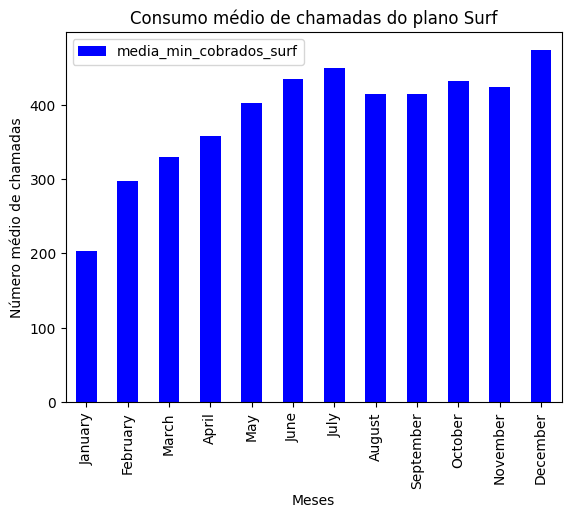

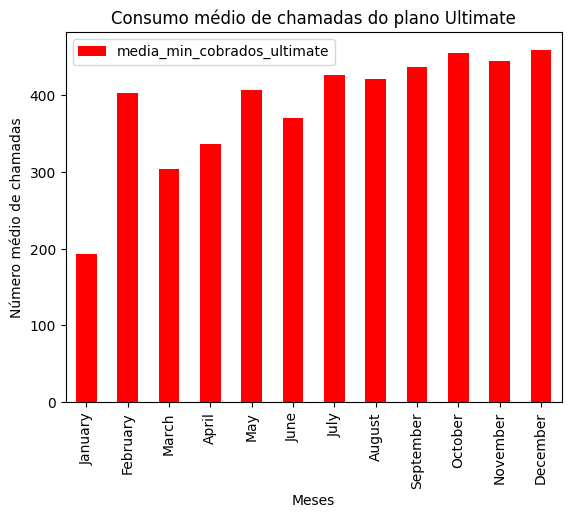

In [30]:
# Compare a duração média das chamadas de cada plano para cada mês. Crie um gráfico de barras para visualizar o resultado.

consolidado['id_month'] = consolidado['id_month'].astype('int')   

plan_surf     = consolidado[consolidado['plan']=='surf']
surf_cham_med = plan_surf.groupby(['id_month','month' ])['min_cobrado'].mean().reset_index()

indice = list(surf_cham_med['month'])
surf_cham_med.index = indice
surf_cham_med = surf_cham_med.drop(['id_month', 'month'], axis=1)
modificar_cabeçalhos_df(surf_cham_med,0,'media_min_cobrados_surf')
surf_cham_med.plot( kind = 'bar', xlabel = 'Meses', ylabel = 'Número médio de chamadas', color = 'blue',
                   title = 'Consumo médio de chamadas do plano Surf')


plan_ultimate     = consolidado[consolidado['plan']=='ultimate']
ultimate_cham_med = plan_ultimate.groupby(['id_month','month'])['min_cobrado'].mean().reset_index()

indice = list(ultimate_cham_med['month'])
ultimate_cham_med.index = indice
ultimate_cham_med = ultimate_cham_med.drop(['id_month', 'month'], axis=1)
modificar_cabeçalhos_df(ultimate_cham_med,0,'media_min_cobrados_ultimate')
ultimate_cham_med.plot( kind = 'bar', xlabel = 'Meses', ylabel = 'Número médio de chamadas', 
                       title = 'Consumo médio de chamadas do plano Ultimate', color = 'red')

print(surf_cham_med)
print()
print('///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////')
print(ultimate_cham_med)

plt.show()

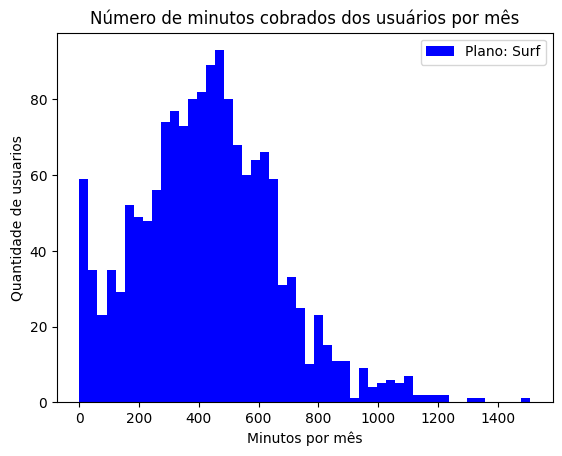

In [31]:
# Compare o número de minutos que os usuários de cada plano necessitam a cada mês. Construa um histograma.

plan_surf['min_cobrado'].plot(kind='hist', color = 'blue', bins=50)

plt.xlabel('Minutos por mês')
plt.ylabel('Quantidade de usuarios')
plt.title('Número de minutos cobrados dos usuários por mês')
plt.legend(['Plano: Surf'])
plt.show()

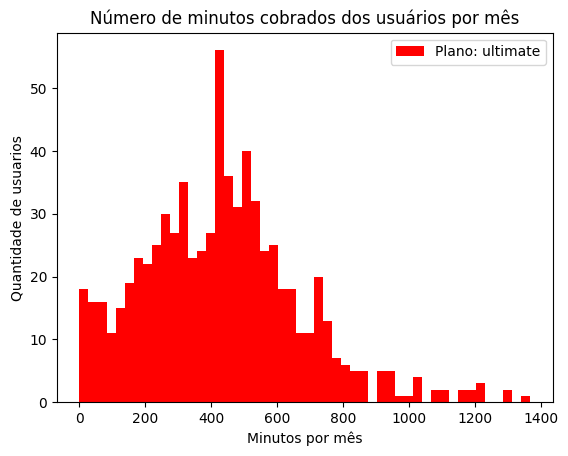

In [32]:
plan_ultimate['min_cobrado'].plot(kind='hist', color = 'red', bins=50)

plt.xlabel('Minutos por mês')
plt.ylabel('Quantidade de usuarios')
plt.title('Número de minutos cobrados dos usuários por mês')
plt.legend(['Plano: ultimate'])
plt.show()

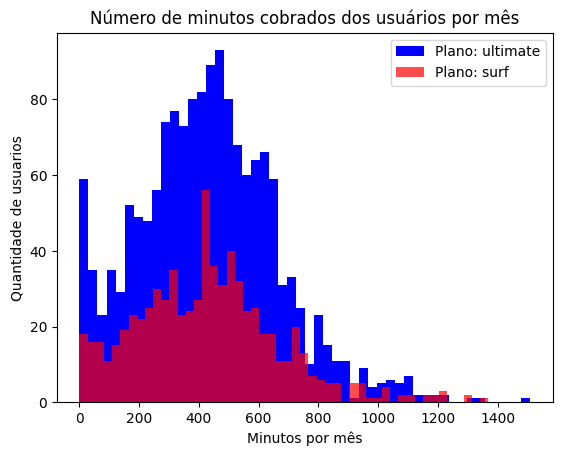

In [33]:
plan_surf['min_cobrado'].plot(kind='hist', color = 'blue', bins=50)
plan_ultimate['min_cobrado'].plot(kind='hist', color = 'red', bins=50, alpha=0.7)
plt.xlabel('Minutos por mês')
plt.ylabel('Quantidade de usuarios')
plt.title('Número de minutos cobrados dos usuários por mês')
plt.legend(['Plano: ultimate','Plano: surf' ])
plt.show()

In [34]:
# Calcule a média e a variância da duração mensal das chamadas

media__variança_coluna(plan_surf,'min_cobrado','SURF')
media__variança_coluna(plan_ultimate,'min_cobrado','ULTIMATE')


VARIÁVEIS ESTATÍSTICAS DESCRITIVAS DO PLANO: SURF /////////////////////////////////////
 Meia estatística: 429.8414634146341
 Mediana estatística: 425.0 
 Variança estatística: 54804.92090010495
 Desviação padrão: 234.1045085001674

VARIÁVEIS ESTATÍSTICAS DESCRITIVAS DO PLANO: ULTIMATE /////////////////////////////////////
 Meia estatística: 431.0486787204451
 Mediana estatística: 424.0 
 Variança estatística: 57666.609047694685
 Desviação padrão: 240.13872875422382


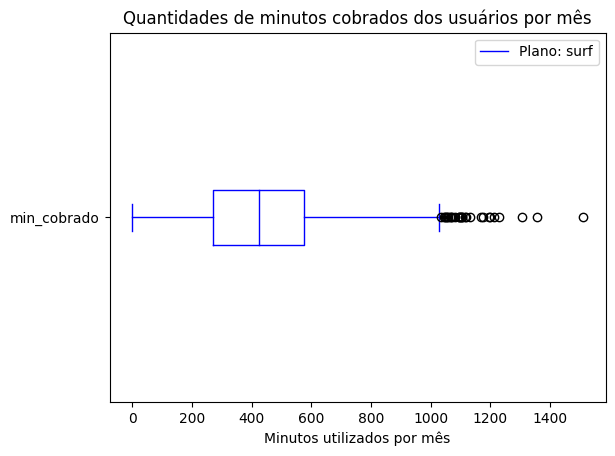

In [35]:
# Faça um diagrama de caixa para visualizar a distribuição da duração mensal das chamadas
plan_surf['min_cobrado'].plot(kind='box', color = 'blue', vert = False)

plt.legend(['Plano: surf'])
plt.xlabel('Minutos utilizados por mês')
plt.title('Quantidades de minutos cobrados dos usuários por mês')
plt.show()

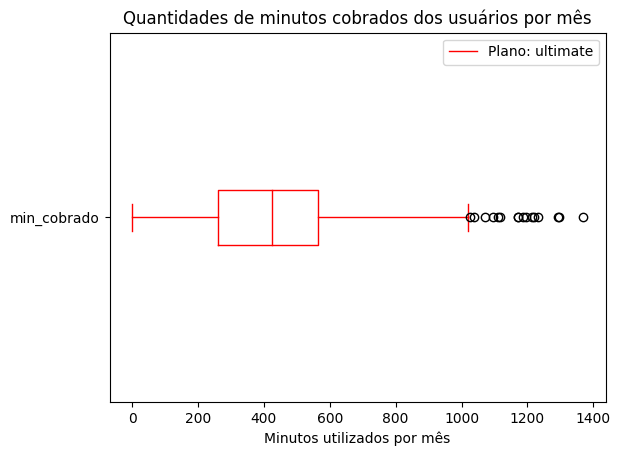

In [36]:
plan_ultimate['min_cobrado'].plot(kind='box', color = 'red', vert = False)

plt.xlabel('Minutos utilizados por mês')
plt.title('Quantidades de minutos cobrados dos usuários por mês')
plt.legend(['Plano: ultimate'])

plt.show()

No que diz respeito aos dados e informações recolhidos dos registos de chamadas dos utilizadas pelos usuarios, podemos verificar que independentemente do plano utilizado pelo usuario, podemos verificar nas informações e gráficos associados que o consumo de todos os usuarios ronda os 429-431 minutos por mês , o que deve ser levado em consideração que os dados apresentam uma variação elevada, razão pela qual não é um dado menor, refletindo a alta dispersão dos dados. 

Calculando o desvio padrão podemos construir um intervalo x̅ ± S para valores da amostra enviada pela empresa e podemos facilmente concluir que 430 ± 235 é um intervalo muito aberto, estamos observando que a amplitude do intervalo em torno de S = ± 235 representa o valor de cerca de 50% de um único lado do intervalo.

e se expandirmos o intervalo para (-235 < x̅ < 235) podemos ver que a largura deste último intervalo excede até o valor médio, que gira em torno de 430 minutos por chamada.

Após a descrição dos dados, podemos definir que os dados referentes aos minutos de chamadas utilizados por cada usuário, independente do plano utilizado, apresentam alta dispersão no comportamento do consumo de minutos por chamadas realizadas. Valeria a pena investigar se estes estão dispersões são orientadas para estações específicas do ano ou se o comportamento de cada utilizador varia ao longo do ano. O que podemos verificar é como o consumo aumenta no final do ano.

Outro ponto importante que podemos observar nos gráficos é que temos muitos valores atípicos fora do limite superior entorno áos 1000 minutos utilizados por mês.

É importante referir que o plano de surf inclui 500 min por mês e o ultimate 3000 min, pelo que podemos constatar que mais de 50% dos usuarios subscritos no plano de surf estão próximos da sua capacidade de consumo com o plano, pelo que são candidatos para oferecer um plano maior que garanta consumo mínimo nas ligações e aumente o faturamento da empresa


### Mensagens

           media_mensagens_surf
January               10.500000
February              12.000000
March                 15.260870
April                 17.632653
May                   23.394737
June                  24.126316
July                  25.800000
August                27.918239
September             29.388601
October               32.081197
November              31.099644
December              37.006309

///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
           media_mensages_ultimate
January                  15.500000
February                 19.857143
March                    20.250000
April                    22.047619
May                      32.103448
June                     29.234043
July                     32.830508
August                   38.478873
September                37.895349
October                  39.800000
November                 38.275591
December                 44.490066


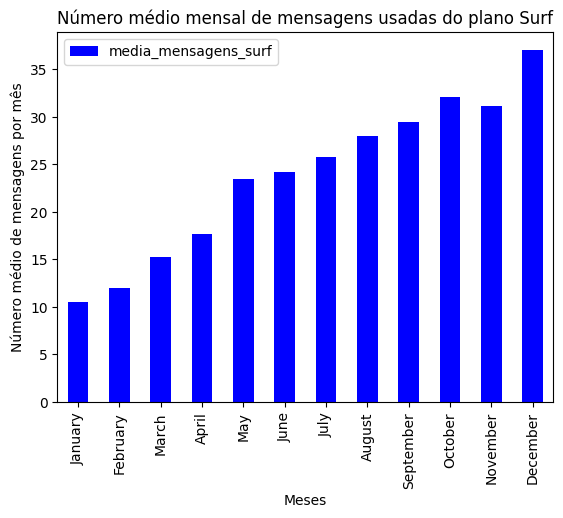

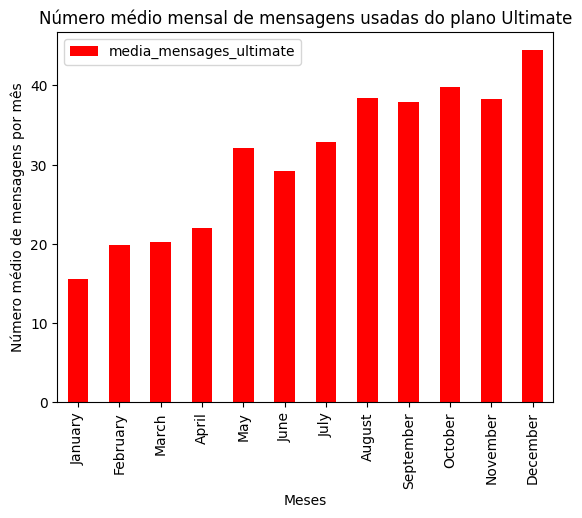

In [37]:
# Compare o número de mensagens que os usuários de cada plano costumam enviar a cada mês

plan_surf          = consolidado[consolidado['plan']=='surf']
surf_mensagens_med = plan_surf.groupby(['id_month','month' ])['message_count'].mean().reset_index()

indice = list(surf_mensagens_med['month'])
surf_mensagens_med.index = indice
surf_mensagens_med = surf_mensagens_med.drop(['id_month', 'month'], axis=1)
modificar_cabeçalhos_df(surf_mensagens_med,0,'media_mensagens_surf')
surf_mensagens_med.plot( kind = 'bar', xlabel = 'Meses', ylabel = 'Número médio de mensagens por mês', color = 'blue',
                        title = 'Número médio mensal de mensagens usadas do plano Surf')


plan_ultimate     = consolidado[consolidado['plan']=='ultimate']
ultimate_mensagens_med = plan_ultimate.groupby(['id_month','month'])['message_count'].mean().reset_index()

indice = list(ultimate_mensagens_med['month'])
ultimate_mensagens_med.index = indice
ultimate_mensagens_med = ultimate_mensagens_med.drop(['id_month', 'month'], axis=1)
modificar_cabeçalhos_df(ultimate_mensagens_med,0,'media_mensages_ultimate')
ultimate_mensagens_med.plot( kind = 'bar', xlabel = 'Meses', ylabel = 'Número médio de mensagens por mês', 
                            title = 'Número médio mensal de mensagens usadas do plano Ultimate', color = 'red')

print(surf_mensagens_med)
print()
print('///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////')
print(ultimate_mensagens_med)

plt.show()

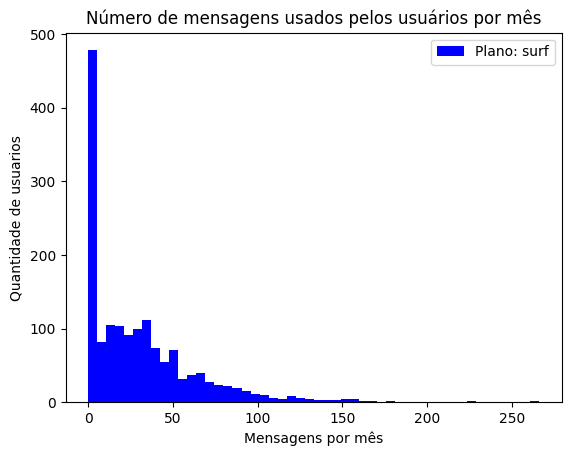

In [38]:
plan_surf['message_count'].plot(kind='hist', color = 'blue', bins=50)

plt.xlabel('Mensagens por mês')
plt.ylabel('Quantidade de usuarios')
plt.title('Número de mensagens usados pelos usuários por mês')
plt.legend(['Plano: surf'])
plt.show()

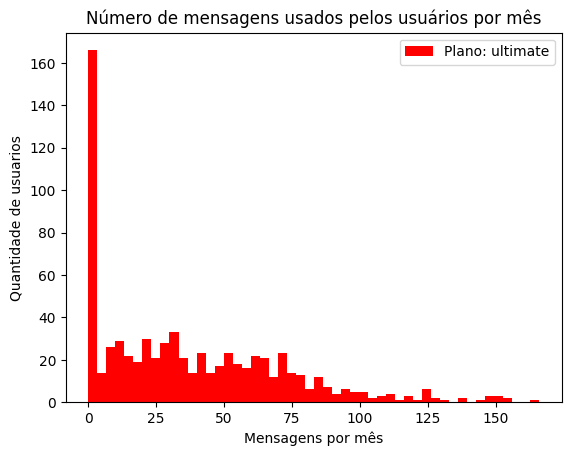

In [39]:
plan_ultimate['message_count'].plot(kind='hist', color = 'red', bins=50)

plt.xlabel('Mensagens por mês')
plt.ylabel('Quantidade de usuarios')
plt.title('Número de mensagens usados pelos usuários por mês')
plt.legend(['Plano: ultimate'])
plt.show()

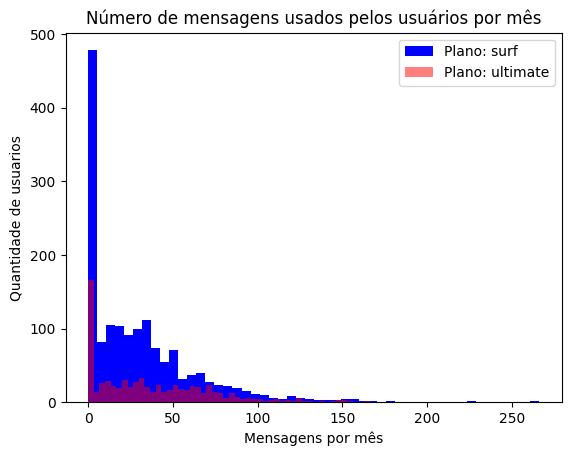

In [40]:
plan_surf['message_count'].plot(kind='hist', color = 'blue', bins=50)
plan_ultimate['message_count'].plot(kind='hist', color = 'red', bins=50, alpha = 0.5)

plt.xlabel('Mensagens por mês')
plt.ylabel('Quantidade de usuarios')
plt.title('Número de mensagens usados pelos usuários por mês')
plt.legend(['Plano: surf', 'Plano: ultimate'])
plt.show()

In [41]:
media__variança_coluna(plan_surf,'message_count','SURF')
media__variança_coluna(plan_ultimate,'message_count','ULTIMATE')


VARIÁVEIS ESTATÍSTICAS DESCRITIVAS DO PLANO: SURF /////////////////////////////////////
 Meia estatística: 29.90885750962773
 Mediana estatística: 23.0 
 Variança estatística: 1077.4483351100625
 Desviação padrão: 32.82450814726799

VARIÁVEIS ESTATÍSTICAS DESCRITIVAS DO PLANO: ULTIMATE /////////////////////////////////////
 Meia estatística: 37.41029207232267
 Mediana estatística: 30.0 
 Variança estatística: 1211.8244621708423
 Desviação padrão: 34.81126918356816


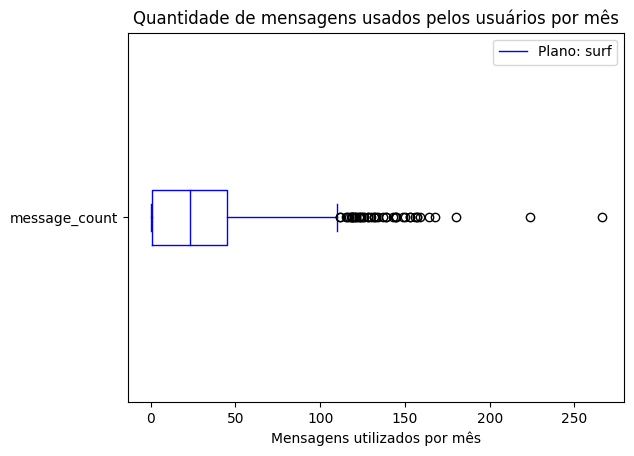

In [42]:
plan_surf['message_count'].plot(kind='box', color = 'blue', vert = False)

plt.legend(['Plano: surf'])
plt.xlabel('Mensagens utilizados por mês')
plt.title('Quantidade de mensagens usados pelos usuários por mês')
plt.show()

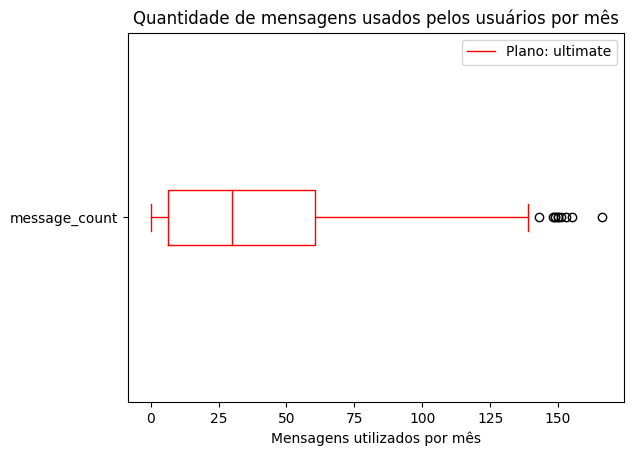

In [43]:
plan_ultimate['message_count'].plot(kind='box', color = 'red', vert = False)

plt.legend(['Plano: ultimate'])
plt.xlabel('Mensagens utilizados por mês')
plt.title('Quantidade de mensagens usados pelos usuários por mês')
plt.show()

No que diz respeito aos dados e informações recolhidos dos registos das mensagens dos utilizadas pelos usuarios, podemos verificar que independentemente do plano utilizado pelo usuario, podemos verificar nas informações e gráficos associados que o consumo de todos os usuarios ronda os 29-37 mensagens medio por mês , o que deve ser levado em consideração que os dados apresentam uma variação elevada com uma desviação padrão da amostra entorno aos 30 mensagens, razão pela qual não é um dado menor, refletindo a alta dispersão dos dados.

Calculando o desvio padrão podemos construir um intervalo x̅ ± S para valores da amostra enviada pela empresa e podemos facilmente concluir que 30 ± 30 é um intervalo muito aberto, estamos observando que a amplitude do intervalo em torno de S = ± 30 representa o valor de 100% de um único lado do intervalo.

e se expandirmos o intervalo para (-30 < x̅ < 30) podemos ver que a largura deste último intervalo excede até o valor médio, que gira em torno de 30-37 mensagens de media por mes.

Após a descrição dos dados, podemos definir que os dados referentes aos mensagens utilizados por cada usuário, independente do plano utilizado, apresentam alta dispersão no comportamento do consumo das mensagens enviadas. Valeria a pena investigar se estes estão dispersões são orientadas para estações específicas do ano ou se o comportamento de cada utilizador varia ao longo do ano. O que podemos verificar é como o consumo aumenta no final do ano.

Outro ponto importante que podemos observar nos gráficos é que temos muitos valores atípicos fora do limite superior entorno áos 125 mansagens enviados por mês.

É importante referir que o plano de surf inclui 50 mensagens por mês e o ultimate 1000 mensagens, pelo que podemos constatar que mais de 75% dos usuarios subscritos no plano de surf estão coberto pela capacidade de consumo com o plano, pelo contrario temos um 25% aproximado de candidatos para oferecer um plano maior que garanta consumo mínimo nas mensagens e aumente o faturamento da empresa

### Internet

           media_trafego_gb__surf
January                  5.000000
February                12.666667
March                   13.782609
April                   12.673469
May                     14.644737
June                    16.094737
July                    17.441667
August                  17.578616
September               17.160622
October                 18.000000
November                16.957295
December                18.671924

///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
           media_trafego_gb_surf
January                 7.250000
February               17.571429
March                  18.833333
April                  16.476190
May                    17.068966
June                   15.829787
July                   16.813559
August                 18.380282
September              17.534884
October                18.257143
November               17.543307
December               18.841060


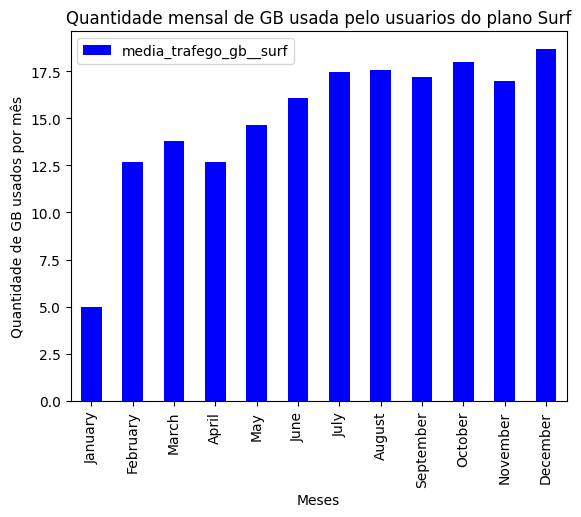

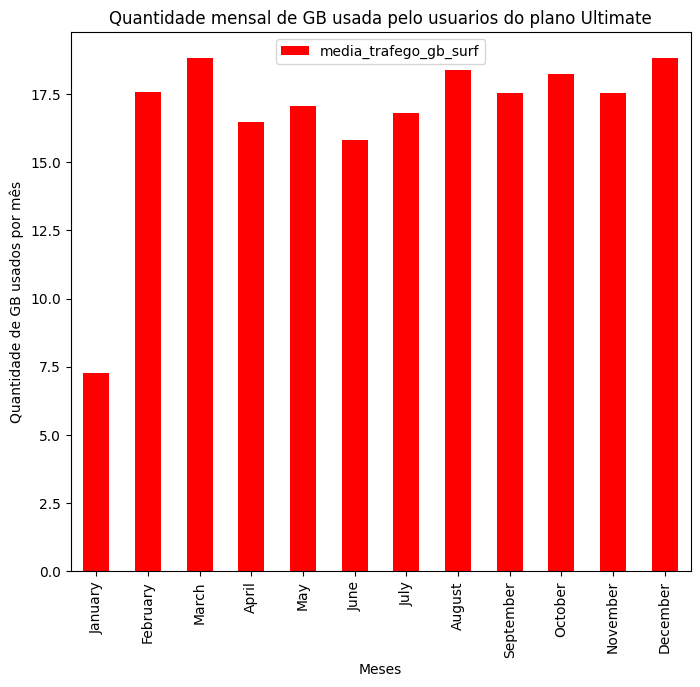

In [44]:
# Compare a quantidade de tráfego de internet consumido pelos usuários por plano

plan_surf          = consolidado[consolidado['plan']=='surf']
surf_trafego_med = plan_surf.groupby(['id_month','month' ])['gb_cobrado'].mean().reset_index()

indice = list(surf_trafego_med['month'])
surf_trafego_med.index = indice
surf_trafego_med = surf_trafego_med.drop(['id_month', 'month'], axis=1)
modificar_cabeçalhos_df(surf_trafego_med,0,'media_trafego_gb__surf')
surf_trafego_med.plot( kind = 'bar', xlabel = 'Meses', ylabel = 'Quantidade de GB usados por mês', color = 'blue',
                        title = 'Quantidade mensal de GB usada pelo usuarios do plano Surf')


plan_ultimate     = consolidado[consolidado['plan']=='ultimate']
ultimate_trafego_med = plan_ultimate.groupby(['id_month','month'])['gb_cobrado'].mean().reset_index()

indice = list(ultimate_trafego_med['month'])
ultimate_trafego_med.index = indice
ultimate_trafego_med = ultimate_trafego_med.drop(['id_month', 'month'], axis=1)
modificar_cabeçalhos_df(ultimate_trafego_med,0,'media_trafego_gb_surf')
ultimate_trafego_med.plot( kind = 'bar', xlabel = 'Meses', ylabel = 'Quantidade de GB usados por mês', 
                          title = 'Quantidade mensal de GB usada pelo usuarios do plano Ultimate', color = 'red', 
                          figsize=(8, 7))

print(surf_trafego_med)
print()
print('///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////')
print(ultimate_trafego_med)

plt.show()

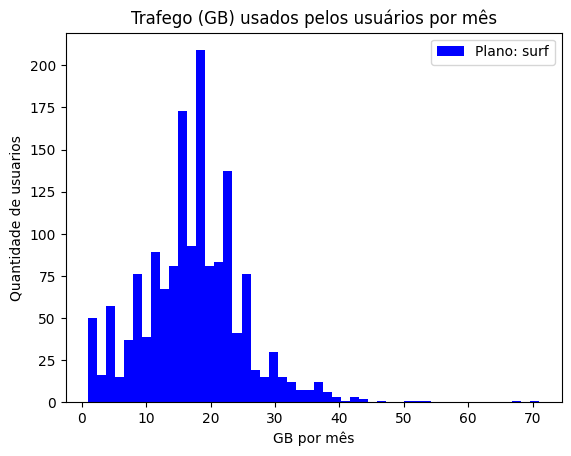

In [45]:
plan_surf['gb_cobrado'].plot(kind='hist', color = 'blue', bins=50)

plt.xlabel('GB por mês')
plt.ylabel('Quantidade de usuarios')
plt.title('Trafego (GB) usados pelos usuários por mês')
plt.legend(['Plano: surf'])
plt.show()

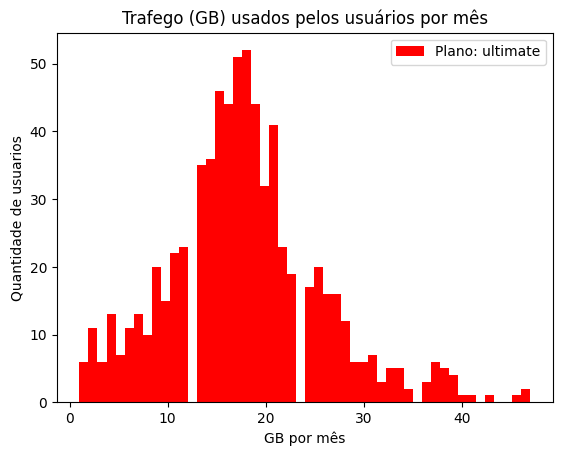

In [46]:
plan_ultimate['gb_cobrado'].plot(kind='hist', color = 'red', bins=50)

plt.xlabel('GB por mês')
plt.ylabel('Quantidade de usuarios')
plt.title('Trafego (GB) usados pelos usuários por mês')
plt.legend(['Plano: ultimate'])
plt.show()

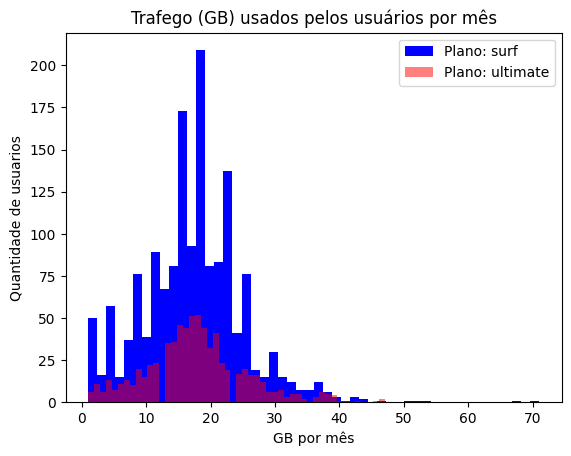

In [47]:
plan_surf['gb_cobrado'].plot(kind='hist', color = 'blue', bins=50)
plan_ultimate['gb_cobrado'].plot(kind='hist', color = 'red', bins=50, alpha = 0.5)

plt.xlabel('GB por mês')
plt.ylabel('Quantidade de usuarios')
plt.title('Trafego (GB) usados pelos usuários por mês')
plt.legend(['Plano: surf', 'Plano: ultimate'])
plt.show()

In [48]:
media__variança_coluna(plan_surf,'gb_cobrado','SURF')
media__variança_coluna(plan_ultimate,'gb_cobrado','ULTIMATE')


VARIÁVEIS ESTATÍSTICAS DESCRITIVAS DO PLANO: SURF /////////////////////////////////////
 Meia estatística: 17.201540436456995
 Mediana estatística: 17.0 
 Variança estatística: 62.05826352148522
 Desviação padrão: 7.87770674254159

VARIÁVEIS ESTATÍSTICAS DESCRITIVAS DO PLANO: ULTIMATE /////////////////////////////////////
 Meia estatística: 17.744089012517385
 Mediana estatística: 17.0 
 Variança estatística: 61.511020025491916
 Desviação padrão: 7.842896150370214


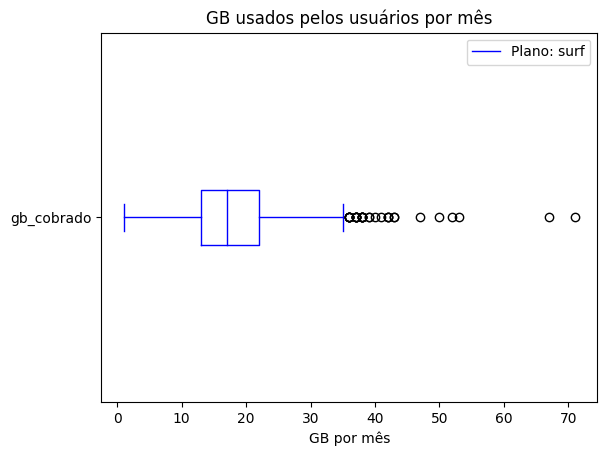

In [49]:
plan_surf['gb_cobrado'].plot(kind='box', color = 'blue', vert = False)

plt.xlabel('GB por mês')
plt.title('GB usados pelos usuários por mês')
plt.legend(['Plano: surf'])
plt.show()

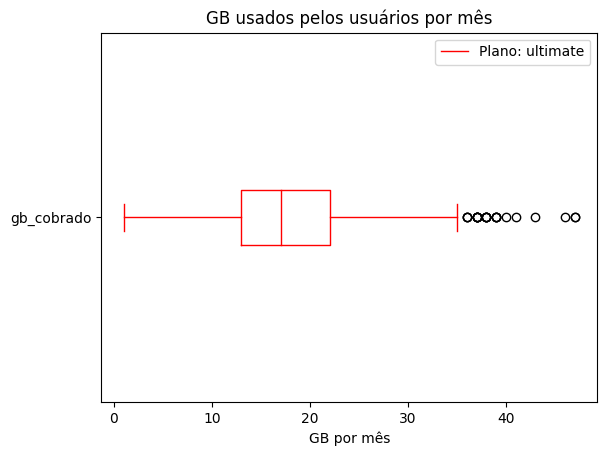

In [50]:
plan_ultimate['gb_cobrado'].plot(kind='box', color = 'red', vert = False)

plt.legend(['Plano: ultimate'])
plt.xlabel('GB por mês')
plt.title('GB usados pelos usuários por mês')
plt.show()

No que diz respeito aos dados e informações recolhidos dos registos do trafego cobrado a cada usuario em GB por mês, podemos verificar que independentemente do plano utilizado pelo usuario, podemos observar nas informações e gráficos associados que o consumo de todos os usuarios ronda os 17 GB medio por mês , o que deve ser levado em consideração que os dados apresentam uma variação elevada com uma desviação padrão da amostra entorno aos 7 GB, razão pela qual não é um dado menor, refletindo a alta dispersão dos dados entorno ao 40%.

Calculando o desvio padrão podemos construir um intervalo x̅ ± S para valores da amostra enviada pela empresa e podemos facilmente concluir que 17 ± 7 é um intervalo muito aberto, estamos observando que a amplitude do intervalo em torno de S = ± 7 representa o valor de 40% de um único lado do intervalo.

e se expandirmos o intervalo para (-7 < x̅ < 7) podemos ver que a largura deste último intervalo excede até o valor médio, que gira em torno de 17 GB de media por mes seria 10 < 17 < 24 GB por mes.

Após a descrição dos dados, podemos definir que os dados referentes ao consumo de GB utilizados por cada usuário, independente do plano utilizado, apresentam alta dispersão no comportamento do consumo de GB utilizados. Valeria a pena investigar se estes estão dispersões são orientadas para estações específicas do ano ou se o comportamento de cada utilizador varia ao longo do ano. O que podemos verificar é como o consumo quase uniforme com uma baixa significativa para o primeiro mês do ano.

Outro ponto importante que podemos observar nos gráficos é que temos muitos valores atípicos fora do limite superior entorno áos 35 GB utilizados por mês, É importante ter em consideração que estes usuarios que ultrapassam o consumo do seu plano são os candidatos a ter em conta numa campanha promocional para contratar um plano com maior cobertura..

É importante referir que o plano de surf inclui 15GB por mês e o ultimate 30 GB, pelo que podemos constatar que mais de 75% dos usuarios subscritos no plano de surf ultrapassam o consumo do seu plano, e nesta categoria de trafego podemos observar que temos um porcentagem menor de usuarios do plano Ultimate menor ao 25% que não estão sendo cobertos por seu plano

## Receita

           media_receita_surf
January             20.000000
February            36.130000
March               46.393478
April               41.312857
May                 48.975526
June                49.980632
July                64.212750
August              65.688805
September           59.099845
October             66.450556
November            59.323238
December            71.292303

///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
           media_receita_surf
January             70.000000
February            70.000000
March               74.573333
April               73.186667
May                 70.617931
June                71.572766
July                71.964746
August              73.024789
September           72.067442
October             72.378667
November            71.746142
December            73.447152


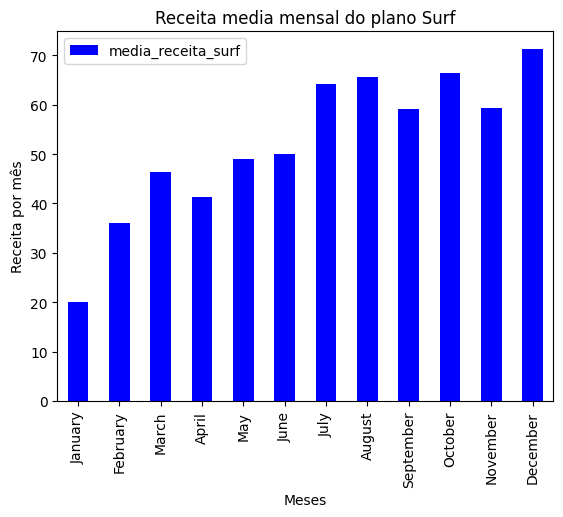

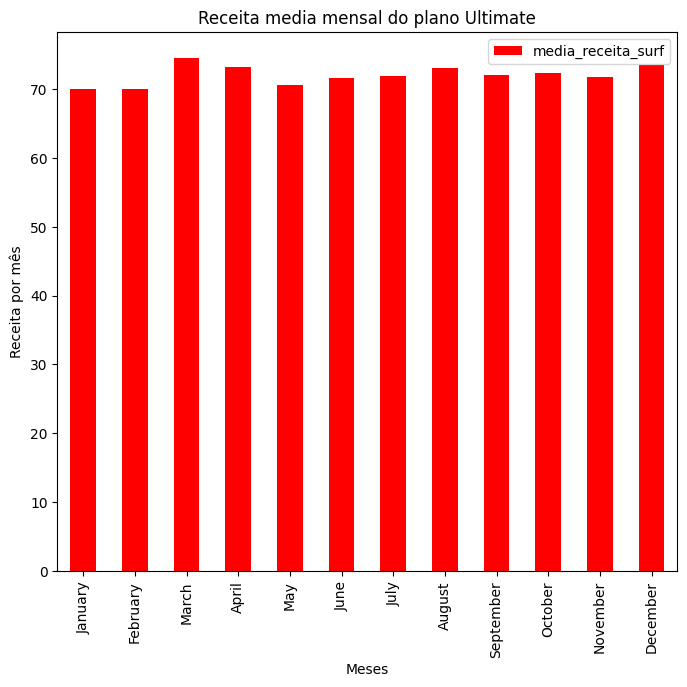

In [51]:
plan_surf          = consolidado[consolidado['plan']=='surf']
surf_receita_med = plan_surf.groupby(['id_month','month' ])['receita_mes'].mean().reset_index()

indice = list(surf_receita_med['month'])
surf_receita_med.index = indice
surf_receita_med = surf_receita_med.drop(['id_month', 'month'], axis=1)
modificar_cabeçalhos_df(surf_receita_med,0,'media_receita_surf')
surf_receita_med.plot( kind = 'bar', xlabel = 'Meses', ylabel = 'Receita por mês', color = 'blue',
                        title = 'Receita media mensal do plano Surf')


plan_ultimate     = consolidado[consolidado['plan']=='ultimate']
ultimate_receita_med = plan_ultimate.groupby(['id_month','month'])['receita_mes'].mean().reset_index()

indice = list(ultimate_receita_med['month'])
ultimate_receita_med.index = indice
ultimate_receita_med = ultimate_receita_med.drop(['id_month', 'month'], axis=1)
modificar_cabeçalhos_df(ultimate_receita_med,0,'media_receita_surf')
ultimate_receita_med.plot( kind = 'bar', xlabel = 'Meses', ylabel = 'Receita por mês', 
                          title = 'Receita media mensal do plano Ultimate', color = 'red', 
                          figsize=(8, 7))

print(surf_receita_med)
print()
print('///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////')
print(ultimate_receita_med)

plt.show()

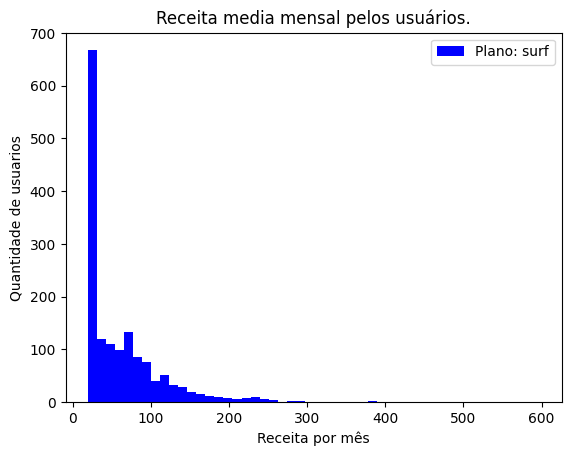

In [52]:
plan_surf['receita_mes'].plot(kind='hist', color = 'blue', bins=50)

plt.xlabel('Receita por mês')
plt.ylabel('Quantidade de usuarios')
plt.title('Receita media mensal pelos usuários.')
plt.legend(['Plano: surf'])
plt.show()

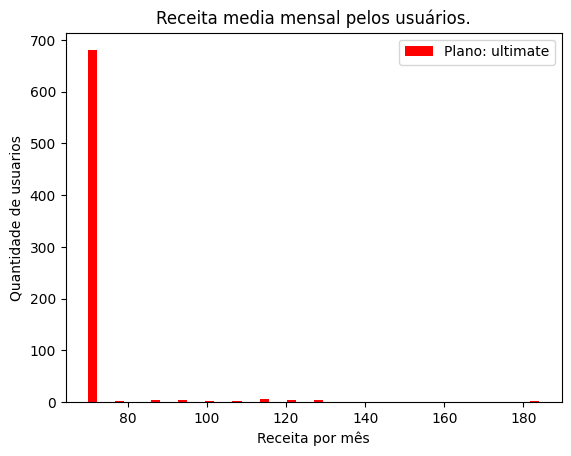

In [53]:
plan_ultimate['receita_mes'].plot(kind='hist', color = 'red', bins=50)

plt.xlabel('Receita por mês')
plt.ylabel('Quantidade de usuarios')
plt.title('Receita media mensal pelos usuários.')
plt.legend(['Plano: ultimate'])
plt.show()

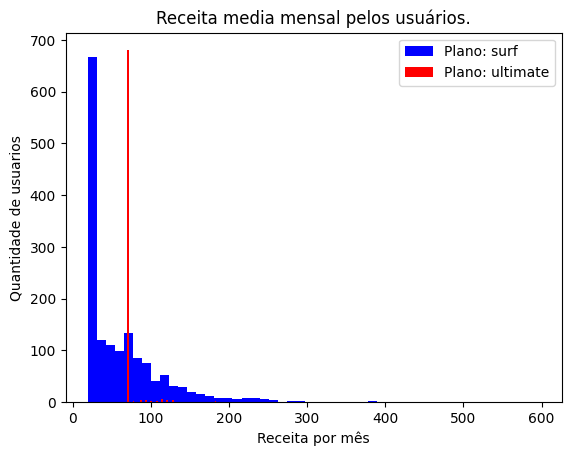

In [54]:
plan_surf['receita_mes'].plot(kind='hist', color = 'blue', bins=50)
plan_ultimate['receita_mes'].plot(kind='hist', color = 'red', bins=50)
plt.xlabel('Receita por mês')
plt.ylabel('Quantidade de usuarios')
plt.title('Receita media mensal pelos usuários.')
plt.legend(['Plano: surf','Plano: ultimate'])
plt.show()

In [55]:
media__variança_coluna(plan_surf,'receita_mes','SURF')
media__variança_coluna(plan_ultimate,'receita_mes','ULTIMATE')


VARIÁVEIS ESTATÍSTICAS DESCRITIVAS DO PLANO: SURF /////////////////////////////////////
 Meia estatística: 61.811354300385105
 Mediana estatística: 41.650000000000006 
 Variança estatística: 3192.257053720248
 Desviação padrão: 56.5000624222686

VARIÁVEIS ESTATÍSTICAS DESCRITIVAS DO PLANO: ULTIMATE /////////////////////////////////////
 Meia estatística: 72.38408901251739
 Mediana estatística: 70.0 
 Variança estatística: 136.77170414805462
 Desviação padrão: 11.69494352906651


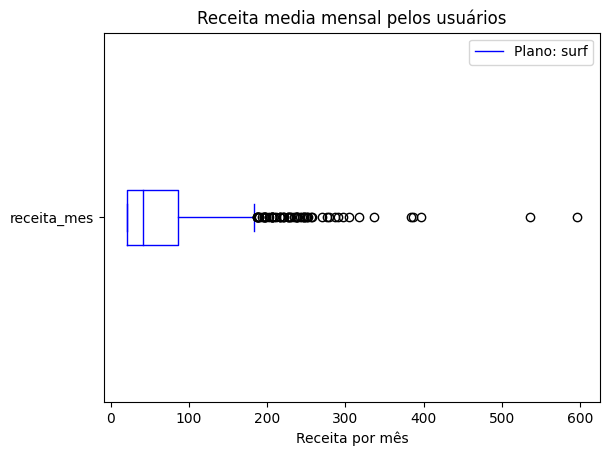

In [56]:
plan_surf['receita_mes'].plot(kind='box', color = 'blue', vert = False)

plt.xlabel('Receita por mês')
plt.title('Receita media mensal pelos usuários')
plt.legend(['Plano: surf'])
plt.show()

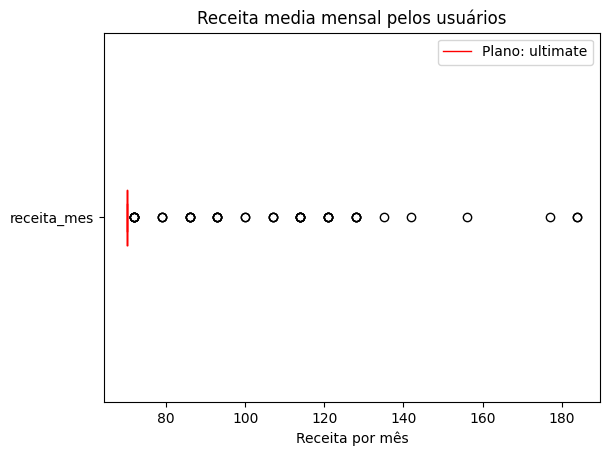

In [57]:
plan_ultimate['receita_mes'].plot(kind='box', color = 'red', vert = False)

plt.xlabel('Receita por mês')
plt.title('Receita media mensal pelos usuários')
plt.legend(['Plano: ultimate'])
plt.show()

Podemos perceber claramente que o rendimento dos usuários de cada plano (surf, ultimate) tem um comportamento diferente, que descreveremos a seguir:

Receita plano surf:  As receitas referentes a todos os usuarios subscritores do plano surf apresentam maior dispersão na informação registada acima da média, pelo que é mais conveniente para a empresa selecionar estes usuarios e oferecer a subscrição do plano Ultimate. Evidenciando maior faturamento para a empresa nos últimos meses do ano

Receita plano ultimate: Pelo contrário, os assinantes do plano Ultimate têm uma receita mais constante para a empresa.

## Teste hipóteses estatísticas

In [58]:
# Teste as hipóteses
# Ordenammos os dados, pelo parametro que precisamos receita média por usuario e por plano


plan_surf     = consolidado[consolidado['plan']=='surf']
media_usuario_receita_surf = plan_surf.groupby('user_id')['receita_mes'].mean().reset_index() 

plan_ultimate     = consolidado[consolidado['plan']=='ultimate']
media_usuario_receita_ultimate = plan_ultimate.groupby('user_id')['receita_mes'].mean().reset_index()

media__variança_coluna(media_usuario_receita_surf, 'receita_mes', 'SURF (RECEITA MEDIA MENSAL DOS USUARIOS)')
media__variança_coluna(media_usuario_receita_ultimate, 'receita_mes', 'ULTIMATE (RECEITA MEDIA MENSAL DOS USUARIOS)')


vetor_surf = list(media_usuario_receita_surf['receita_mes'])
vetor_ultimate = list(media_usuario_receita_ultimate['receita_mes'])



VARIÁVEIS ESTATÍSTICAS DESCRITIVAS DO PLANO: SURF (RECEITA MEDIA MENSAL DOS USUARIOS) /////////////////////////////////////
 Meia estatística: 59.00172075422904
 Mediana estatística: 47.71111111111111 
 Variança estatística: 1960.0584613031228
 Desviação padrão: 44.27254749055133

VARIÁVEIS ESTATÍSTICAS DESCRITIVAS DO PLANO: ULTIMATE (RECEITA MEDIA MENSAL DOS USUARIOS) /////////////////////////////////////
 Meia estatística: 71.89570855047288
 Mediana estatística: 70.0 
 Variança estatística: 57.66006147461778
 Desviação padrão: 7.593422250515098


In [59]:
#Dados gerais:
    # hipóteses: que a receita média dos usuários dos planos Ultimate e Surf são diferentes
    # Consideramos que σ2 (população)= é desconhecido
    # Consideramos que as 2 variaveis são independentes
    # Consideramos que as varianças não são iguais
    # Consideramos um Nivel de Confiança do 95%
    # Consideramos ERRO = 5%, α = 0.05 (Nivel critico de significancia estatística)
    # Consideramos que o tamanho da amostra pelo teorema do limite central é grande o suficiente para aplicar um teste t.
    # Definimos que Ho = µ = µo (receita media da população dos usuarios do plano surf = receita media da população dos usuarios do plano ultimate )
    # Definimos que H1 = µ ≠ µo

# Em principio rejeitar a hipóteses nula: vai significar aceitar que as receitas médias dos usuarios dos planos são diferentes.

vetor_surf     # Vetor de médias das receitas mensal dos usuarios do plano SURF
vetor_ultimate # Vetor de médias das receitas mensal dos usuarios do plano ULTIMATE

alpha = 0.05
resultado = st.ttest_ind(vetor_surf,vetor_ultimate, equal_var=False)
if resultado.pvalue < alpha:
    print("Rejeitamos a hipóteses nula: aceitamos que as receitas médias dos usuarios dos planos são diferentes")
else:
    print("Não podemos rejeitar a hipóteses nula: que as receitas médias dos usuarios dos planos são diferentes")

Rejeitamos a hipóteses nula: aceitamos que as receitas médias dos usuarios dos planos são diferentes


In [60]:
# Teste as hipóteses

consolidado['state'].unique()
receitas_outras_regiões = consolidado[~consolidado['state'].isin([' NY-NJ-PA MSA'])]
receitas_outras_ny_nj = consolidado[consolidado['state'].isin([' NY-NJ-PA MSA'])]

media__variança_coluna(receitas_outras_ny_nj, 'receita_mes', 'RECEITA MEDIA MENSAL DOS USUARIOS DA AREA NY-NJ')
media__variança_coluna(receitas_outras_regiões, 'receita_mes', 'RECEITA MEDIA MENSAL DOS USUARIOS DAS OUTRAS REGIÕES')


VARIÁVEIS ESTATÍSTICAS DESCRITIVAS DO PLANO: RECEITA MEDIA MENSAL DOS USUARIOS DA AREA NY-NJ /////////////////////////////////////
 Meia estatística: 60.70768617021277
 Mediana estatística: 56.400000000000006 
 Variança estatística: 1967.306235965248
 Desviação padrão: 44.35432601184746

VARIÁVEIS ESTATÍSTICAS DESCRITIVAS DO PLANO: RECEITA MEDIA MENSAL DOS USUARIOS DAS OUTRAS REGIÕES /////////////////////////////////////
 Meia estatística: 66.02849026827985
 Mediana estatística: 70.0 
 Variança estatística: 2303.6381165089842
 Desviação padrão: 47.99623023226912


<div class="alert alert-block alert-warning">
<b>Comentário do revisor: </b> <a class="tocSkip"></a>

Você pode usar .str.contains('NY-NJ')
</div>

In [61]:
#Dados gerais:
 # hipóteses: que a receita média dos usuários da área de NY-NJ difere dos usuários das demais regiões
 # Consideramos que σ2 (população)= é desconhecido
 # Consideramos que as 2 variaveis são independentes
 # Consideramos que as varianças não são iguais
 # Consideramos um Nivel de Confiança do 95%
 # Consideramos ERRO = 5%, α = 0.05 (Nivel critico de significancia estatística)
 # Consideramos que o tamanho da amostra pelo teorema do limite central é grande o suficiente para aplicar um teste t.
 # Definimos que Ho = µ = µo (receita media da população dos usuarios da area NY-NJ = receita media da população dos usuarios das OUTRA REGIÕES)
 # Definimos que H1 = µ ≠ µo

# Em principio rejeitar a hipóteses nula: vai significar aceitar que as receitas médias dos usuarios NY-NJ difere das outras regiões.

vetor_reg_surf     = list(receitas_outras_regiões['receita_mes']) # Vetor de médias das receitas mensal dos usuarios da area NY-NJ
vetor_reg_ultimate = list(receitas_outras_ny_nj['receita_mes'])  # Vetor de médias das receitas mensal dos usuarios das outras regiões

alpha = 0.05
resul = st.ttest_ind(vetor_reg_surf,vetor_reg_ultimate, equal_var=False)
if resul.pvalue < alpha:
    print("Rejeitamos a hipóteses nula: aceitamos que as receitas médias dos usuarios de NY-NJ difere das outras regiões")
else:
    print("Não podemos rejeitar a hipóteses nula: que as receitas médias dos usuarios de NY-NJ difere das outras regiões")

Rejeitamos a hipóteses nula: aceitamos que as receitas médias dos usuarios de NY-NJ difere das outras regiões


## Conclusão geral


A lógica de juntar ou combinar diversas tabelas com um registro de informações relacionadas nos mostra como podemos focar em uma estrutura separada e ela pode ser relacionada de forma dinâmica, utilizando as funções trabalhadas para processar diversas informações registradas em tabelas diferentes, mas com pontos comuns que orienta nos dá uma ideia de módulos separados, mas executando funções comuns.

Não cabe a um analista confiar nas informações recebidas e ainda mais se for uma grande quantidade de informações, pela amostra de registros recebidos deu a impressão de que os dados estavam limitados a informações limitadas ao ano de 2018, por isso foi uma prioridade para verificar Essa informação, uma vez confirmada, podemos definir nossas limitações para esse ano. Essa etapa foi importante porque determina se os valores referentes a cada mês realmente se referem ao mês do ano indicado.


A exploração e limpeza dos dados foram sempre realizadas com base nos critérios de boas práticas, verificando valores duplicados em variáveis críticas, revisando valores faltantes e preenchendo com base na lógica que os próprios dados sugerem, bem como analisando os tipos de os dados para cada variável tornaram-se importantes nesta fase.

Existem muitas variáveis externas econômicas e pessoais que podem influenciar o comportamento de consumo de cada categoria (chamadas, mensagens, tráfego de internet) de cada plano por parte do usuário, por exemplo o consumo de um usuário que trabalha com ferramentas de comunicação não vai. ser igual a alguém que atua na área direta de construção, portanto a obtenção de outras informações pode ajudar a estratificar melhor os usuários, estabelecendo assim melhores padrões de comportamento.

A empresa perseguirá sempre o objetivo de maximizar os seus lucros, pelo que podemos constatar que existem muitos usuarios atribuídos ao plano de surf que geram um rendimento para a empresa igual ou superior em alguns casos aos usuarios atribuídos ao plano ultimate, portanto é importante que a área responsável dentro da empresa (marketing - vendas) consiga gerar estratégias para capturar esse mercado potencial que já está em nossa carteira de clientes e poderá gerar receitas ainda maiores.

Podemos perceber que cada análise pode ser de maior interesse para cada área da empresa, por exemplo vamos focar o ponto na área de marketing e comercialização dividida em dois setores: a análise separada do comportamento de cada categoria (chamadas, mensagens, tráfego de internet) o resultado dessas análises pode ser um insumo fundamental para a área de marketing ajustar suas estratégias tanto para clientes que já fazem parte de sua carteira de clientes quanto para futuros clientes que pretendem ser captados no mercado de consumo e para a área de vendas, a análise do faturamento permite perceber se as metas propostas pela área de vendas estão sendo cumpridas e quais estratégias podem ser para melhorar ou manter as vendas registradas.

Com relação aos 2 planos avaliados podemos perceber que a hipótese de que a renda média mensal dos planos é igual é rejeitada então podemos interpretar que eles são diferentes, da mesma forma que vemos cada estrato de cada região tem uma renda diferente em pelo menos Isso se reflete na área do estado de NY-NJ em relação a todas as outras regiões.